In [231]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoLocator
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
import numpy as np
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import scipy.stats as st

In [232]:
CASS = pd.read_csv("D:\Data\Project\Cargo Price Analysis\To Github\Compiled Data\CASS.csv")
PPI = pd.read_csv("D:\Data\Project\Cargo Price Analysis\To Github\Compiled Data\PPI.csv")

## Initial Data Exploration
In this phase, we will do the following
1. Load the first and last 5 data of each
2. Get descriptive summary for each
3. Plot the data for each variable

In [233]:
CASS

Date   CASS         LA  AUTOINV    HH  RETAILINV  Gold  Computer  \
0    1/1/2014  2.246  360036.60    2.918  4.68       1.46  2.16     21545   
1    2/1/2014  2.237  284812.35    2.989  4.84       1.44  2.61     21254   
2    3/1/2014  2.246  327497.05    2.791  4.89       1.43  3.22     21560   
3    4/1/2014  2.268  364126.05    2.771  4.55       1.42  3.13     21674   
4    5/1/2014  2.314  351403.60    2.629  4.72       1.42  2.42     20805   
..        ...    ...        ...      ...   ...        ...   ...       ...   
92   9/1/2021  3.242  468059.15    0.448  5.38       1.09  4.72     25211   
93  10/1/2021  3.294  467286.65    0.338  5.73       1.07  5.04     25449   
94  11/1/2021  3.475  403443.90    0.188  5.53       1.08  5.02     26508   
95  12/1/2021  3.596  385250.70    0.312  5.54       1.17  4.91     25788   
96   1/1/2022  3.704  427207.70    0.171  6.39       1.13  4.78     25846   

       LAP  AUTOINVP     HHP  RETAILINVP   GoldP  ComputerP  
0   0.0000    0.0000  0.0000      0.0000  0.0000     0.0000  
1  -0.2089    0.0243  0.0356     -0.0137  0.2076    -0.0135  
2   0.1499   -0.0662  0.0089     -0.0069  0.2317     0.0144  
3   0.1118   -0.0072 -0.0696     -0.0070 -0.0285     0.0053  
4  -0.0349   -0.0512  0.0390      0.0000 -0.2270    -0.0401  
..     ...       ...     ...         ...     ...        ...  
92 -0.0363   -0.3222  0.0789     -0.0091 -0.0577    -0.0017  
93 -0.0017   -0.2455  0.0648     -0.0183  0.0675     0.0094  
94 -0.1366   -0.4438 -0.0346      0.0093 -0.0031     0.0416  
95 -0.0451    0.6596  0.0013      0.0833 -0.0221    -0.0272  
96  0.1089   -0.4519  0.1552     -0.0342 -0.0261     0.0022  

[97 rows x 14 columns]

In [234]:
CASS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        97 non-null     object 
 1   CASS        97 non-null     float64
 2   LA          97 non-null     float64
 3   AUTOINV     97 non-null     float64
 4   HH          97 non-null     float64
 5   RETAILINV   97 non-null     float64
 6   Gold        97 non-null     float64
 7   Computer    97 non-null     int64  
 8   LAP         97 non-null     float64
 9   AUTOINVP    97 non-null     float64
 10  HHP         97 non-null     float64
 11  RETAILINVP  97 non-null     float64
 12  GoldP       97 non-null     float64
 13  ComputerP   97 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 10.7+ KB


In [235]:
CASS['Date'] = pd.to_datetime(CASS['Date'])

In [236]:
PPI

DATE  PCU483111483111  T5YIE    HH    USOIL  RETAILINV    TRUCK  \
0    1/1/2014          263.000   1.72  4.68   97.450       1.46  114.100   
1    2/1/2014          262.200   1.79  4.84  102.650       1.44  114.200   
2    3/1/2014          262.100   1.70  4.89  101.490       1.43  114.600   
3    4/1/2014          263.300   1.96  4.55   99.660       1.42  115.600   
4    5/1/2014          264.000   1.93  4.72  102.830       1.42  116.100   
..        ...              ...    ...   ...      ...        ...      ...   
92   9/1/2021          346.891   2.51  5.38   75.048       1.09  143.747   
93  10/1/2021          356.860   2.89  5.73   83.284       1.07  146.798   
94  11/1/2021          353.440   2.80  5.53   66.945       1.08  150.343   
95  12/1/2021          365.693   2.87  5.54   75.351       1.17  151.551   
96   1/1/2022          369.291   2.82  6.39   88.127       1.13  153.969   

       MFS  T5YIEP     HHP  USOILP  RETAILINVP  TRUCKP    MFSP  
0   373033  0.0000  0.0000  0.0000      0.0000  0.0000  0.0000  
1   378581  0.0407  0.0356  0.0534     -0.0137  0.0009  0.0149  
2   382601 -0.0503  0.0089 -0.0113     -0.0069  0.0035  0.0106  
3   386689  0.1529 -0.0696 -0.0180     -0.0070  0.0087  0.0107  
4   387100 -0.0153  0.0390  0.0318      0.0000  0.0043  0.0011  
..     ...     ...     ...     ...         ...     ...     ...  
92  554233  0.0121  0.0789  0.0950     -0.0091  0.0131  0.0072  
93  565388  0.1514  0.0648  0.1097     -0.0183  0.0212  0.0201  
94  569560 -0.0311 -0.0346 -0.1962      0.0093  0.0241  0.0074  
95  552629  0.0250  0.0013  0.1256      0.0833  0.0080 -0.0297  
96  583981 -0.0174  0.1552  0.1696     -0.0342  0.0160  0.0567  

[97 rows x 14 columns]

In [237]:
PPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             97 non-null     object 
 1   PCU483111483111  97 non-null     float64
 2   T5YIE            97 non-null     float64
 3   HH               97 non-null     float64
 4   USOIL            97 non-null     float64
 5   RETAILINV        97 non-null     float64
 6   TRUCK            97 non-null     float64
 7   MFS              97 non-null     int64  
 8   T5YIEP           97 non-null     float64
 9   HHP              97 non-null     float64
 10  USOILP           97 non-null     float64
 11  RETAILINVP       97 non-null     float64
 12  TRUCKP           97 non-null     float64
 13  MFSP             97 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 10.7+ KB


In [238]:
PPI['DATE'] = pd.to_datetime(PPI['DATE'])

In [239]:
CASS.describe()

CASS             LA    AUTOINV         HH  RETAILINV       Gold  \
count  97.000000      97.000000  97.000000  97.000000  97.000000  97.000000   
mean    2.408897  392190.111340   2.273722   3.694536   1.401649   3.110825   
std     0.327370   61209.743757   0.696555   0.852998   0.133461   0.937479   
min     2.067000  220254.550000   0.171000   2.200000   1.070000   1.960000   
25%     2.213000  360744.650000   2.082000   3.080000   1.420000   2.420000   
50%     2.289000  388670.050000   2.495000   3.460000   1.450000   2.820000   
75%     2.454000  429922.750000   2.644000   4.430000   1.480000   3.680000   
max     3.704000  535714.200000   3.932000   6.390000   1.670000   5.080000   

           Computer        LAP   AUTOINVP        HHP  RETAILINVP      GoldP  \
count     97.000000  97.000000  97.000000  97.000000   97.000000  97.000000   
mean   22181.618557   0.014330  -0.018837   0.009380   -0.002129   0.014424   
std     1535.449123   0.166129   0.140092   0.112466    0.031152   0.113449   
min    19430.000000  -0.348900  -0.451900  -0.267100   -0.197600  -0.227000   
25%    21205.000000  -0.085400  -0.053700  -0.041400   -0.006800  -0.052600   
50%    21851.000000  -0.001700  -0.006600   0.008900    0.000000   0.002300   
75%    22617.000000   0.110200   0.024000   0.058000    0.006900   0.075300   
max    26508.000000   0.694900   0.659600   0.334000    0.098700   0.351100   

       ComputerP  
count  97.000000  
mean    0.002078  
std     0.020296  
min    -0.042800  
25%    -0.008700  
50%     0.000000  
75%     0.013200  
max     0.090100

In [240]:
PPI.describe()

PCU483111483111      T5YIE         HH       USOIL  RETAILINV  \
count        97.000000  97.000000  97.000000   97.000000  97.000000   
mean        281.959082   1.732268   3.694536   58.424763   1.401649   
std          31.109550   0.450108   0.852998   17.970465   0.133461   
min         236.000000   0.490000   2.200000   19.045000   1.070000   
25%         261.100000   1.470000   3.080000   47.070000   1.420000   
50%         275.100000   1.690000   3.460000   54.100000   1.450000   
75%         304.200000   1.950000   4.430000   66.945000   1.480000   
max         369.291000   2.890000   6.390000  105.450000   1.670000   

            TRUCK            MFS     T5YIEP        HHP     USOILP  RETAILINVP  \
count   97.000000      97.000000  97.000000  97.000000  97.000000   97.000000   
mean   121.459979  439738.041237   0.014049   0.009380   0.008766   -0.002129   
std      9.755226   53128.807778   0.124282   0.112466   0.142144    0.031152   
min    111.600000  373033.000000  -0.631600  -0.267100  -0.555900   -0.197600   
25%    113.800000  397052.000000  -0.050300  -0.041400  -0.058600   -0.006800   
50%    118.800000  432148.000000   0.013400   0.008900   0.008400    0.000000   
75%    125.600000  456500.000000   0.066700   0.058000   0.067800    0.006900   
max    153.969000  583981.000000   0.469400   0.334000   0.847500    0.098700   

          TRUCKP       MFSP  
count  97.000000  97.000000  
mean    0.003118   0.005024  
std     0.007197   0.028582  
min    -0.021100  -0.125200  
25%    -0.000900  -0.002100  
50%     0.001800   0.003200  
75%     0.007300   0.007600  
max     0.024100   0.170400

### Specific Summary
In this summary, we will try to narrow down the typical behavior of each variable starting from 2020 up until now

In [241]:
CASS[CASS['Date'] >= '2020-01-1'].describe()

CASS             LA    AUTOINV        HH  RETAILINV       Gold  \
count  25.000000      25.000000  25.000000  25.00000  25.000000  25.000000   
mean    2.816800  430701.370000   1.510480   4.19520   1.221600   4.503200   
std     0.397853   76560.239665   0.939975   1.20335   0.154534   0.580091   
min     2.406000  220254.550000   0.171000   2.20000   1.070000   2.710000   
25%     2.471000  403443.900000   0.661000   3.06000   1.100000   4.390000   
50%     2.714000  460865.000000   1.823000   4.60000   1.210000   4.610000   
75%     3.049000  471794.500000   1.966000   5.07000   1.260000   4.890000   
max     3.704000  535714.200000   3.932000   6.39000   1.670000   5.080000   

           Computer        LAP   AUTOINVP        HHP  RETAILINVP      GoldP  \
count     25.000000  25.000000  25.000000  25.000000   25.000000  25.000000   
mean   24321.520000   0.021124  -0.055448   0.036824   -0.007812   0.023928   
std     1143.168736   0.191982   0.265476   0.119095    0.059982   0.078454   
min    22605.000000  -0.348900  -0.451900  -0.267100   -0.197600  -0.110000   
25%    23302.000000  -0.082500  -0.231700  -0.027100   -0.018300  -0.035300   
50%    24561.000000  -0.001700  -0.069400   0.021200    0.000000   0.015000   
75%    24973.000000   0.108900   0.044900   0.080300    0.015900   0.062300   
max    26508.000000   0.680400   0.659600   0.334000    0.098700   0.194400   

       ComputerP  
count  25.000000  
mean    0.006628  
std     0.014033  
min    -0.027200  
25%    -0.000500  
50%     0.004500  
75%     0.012200  
max     0.041600

In [242]:
PPI[PPI['DATE'] >= '2020-01-1'].describe()

PCU483111483111      T5YIE        HH      USOIL  RETAILINV       TRUCK  \
count        25.000000  25.000000  25.00000  25.000000  25.000000   25.000000   
mean        312.833240   1.984800   4.19520  54.843680   1.221600  133.376720   
std          29.240597   0.724547   1.20335  18.664908   0.154534   10.195195   
min         281.100000   0.490000   2.20000  19.045000   1.070000  120.600000   
25%         287.800000   1.500000   3.06000  40.440000   1.100000  124.700000   
50%         302.100000   2.210000   4.60000  52.169000   1.210000  129.800000   
75%         336.900000   2.560000   5.07000  68.535000   1.260000  140.718000   
max         369.291000   2.890000   6.39000  88.127000   1.670000  153.969000   

                 MFS     T5YIEP        HHP     USOILP  RETAILINVP     TRUCKP  \
count      25.000000  25.000000  25.000000  25.000000   25.000000  25.000000   
mean   509898.680000   0.045848   0.036824   0.040244   -0.007812   0.008164   
std     51584.070473   0.200740   0.119095   0.233254    0.059982   0.010517   
min    379892.000000  -0.631600  -0.267100  -0.555900   -0.197600  -0.021100   
25%    481303.000000  -0.031100  -0.027100  -0.067100   -0.018300   0.005700   
50%    503981.000000   0.036400   0.021200   0.058100    0.000000   0.009300   
75%    554233.000000   0.151400   0.080300   0.109700    0.015900   0.015400   
max    583981.000000   0.469400   0.334000   0.847500    0.098700   0.024100   

            MFSP  
count  25.000000  
mean    0.011200  
std     0.055395  
min    -0.125200  
25%    -0.012000  
50%     0.005500  
75%     0.020100  
max     0.170400

<function matplotlib.pyplot.show(close=None, block=None)>

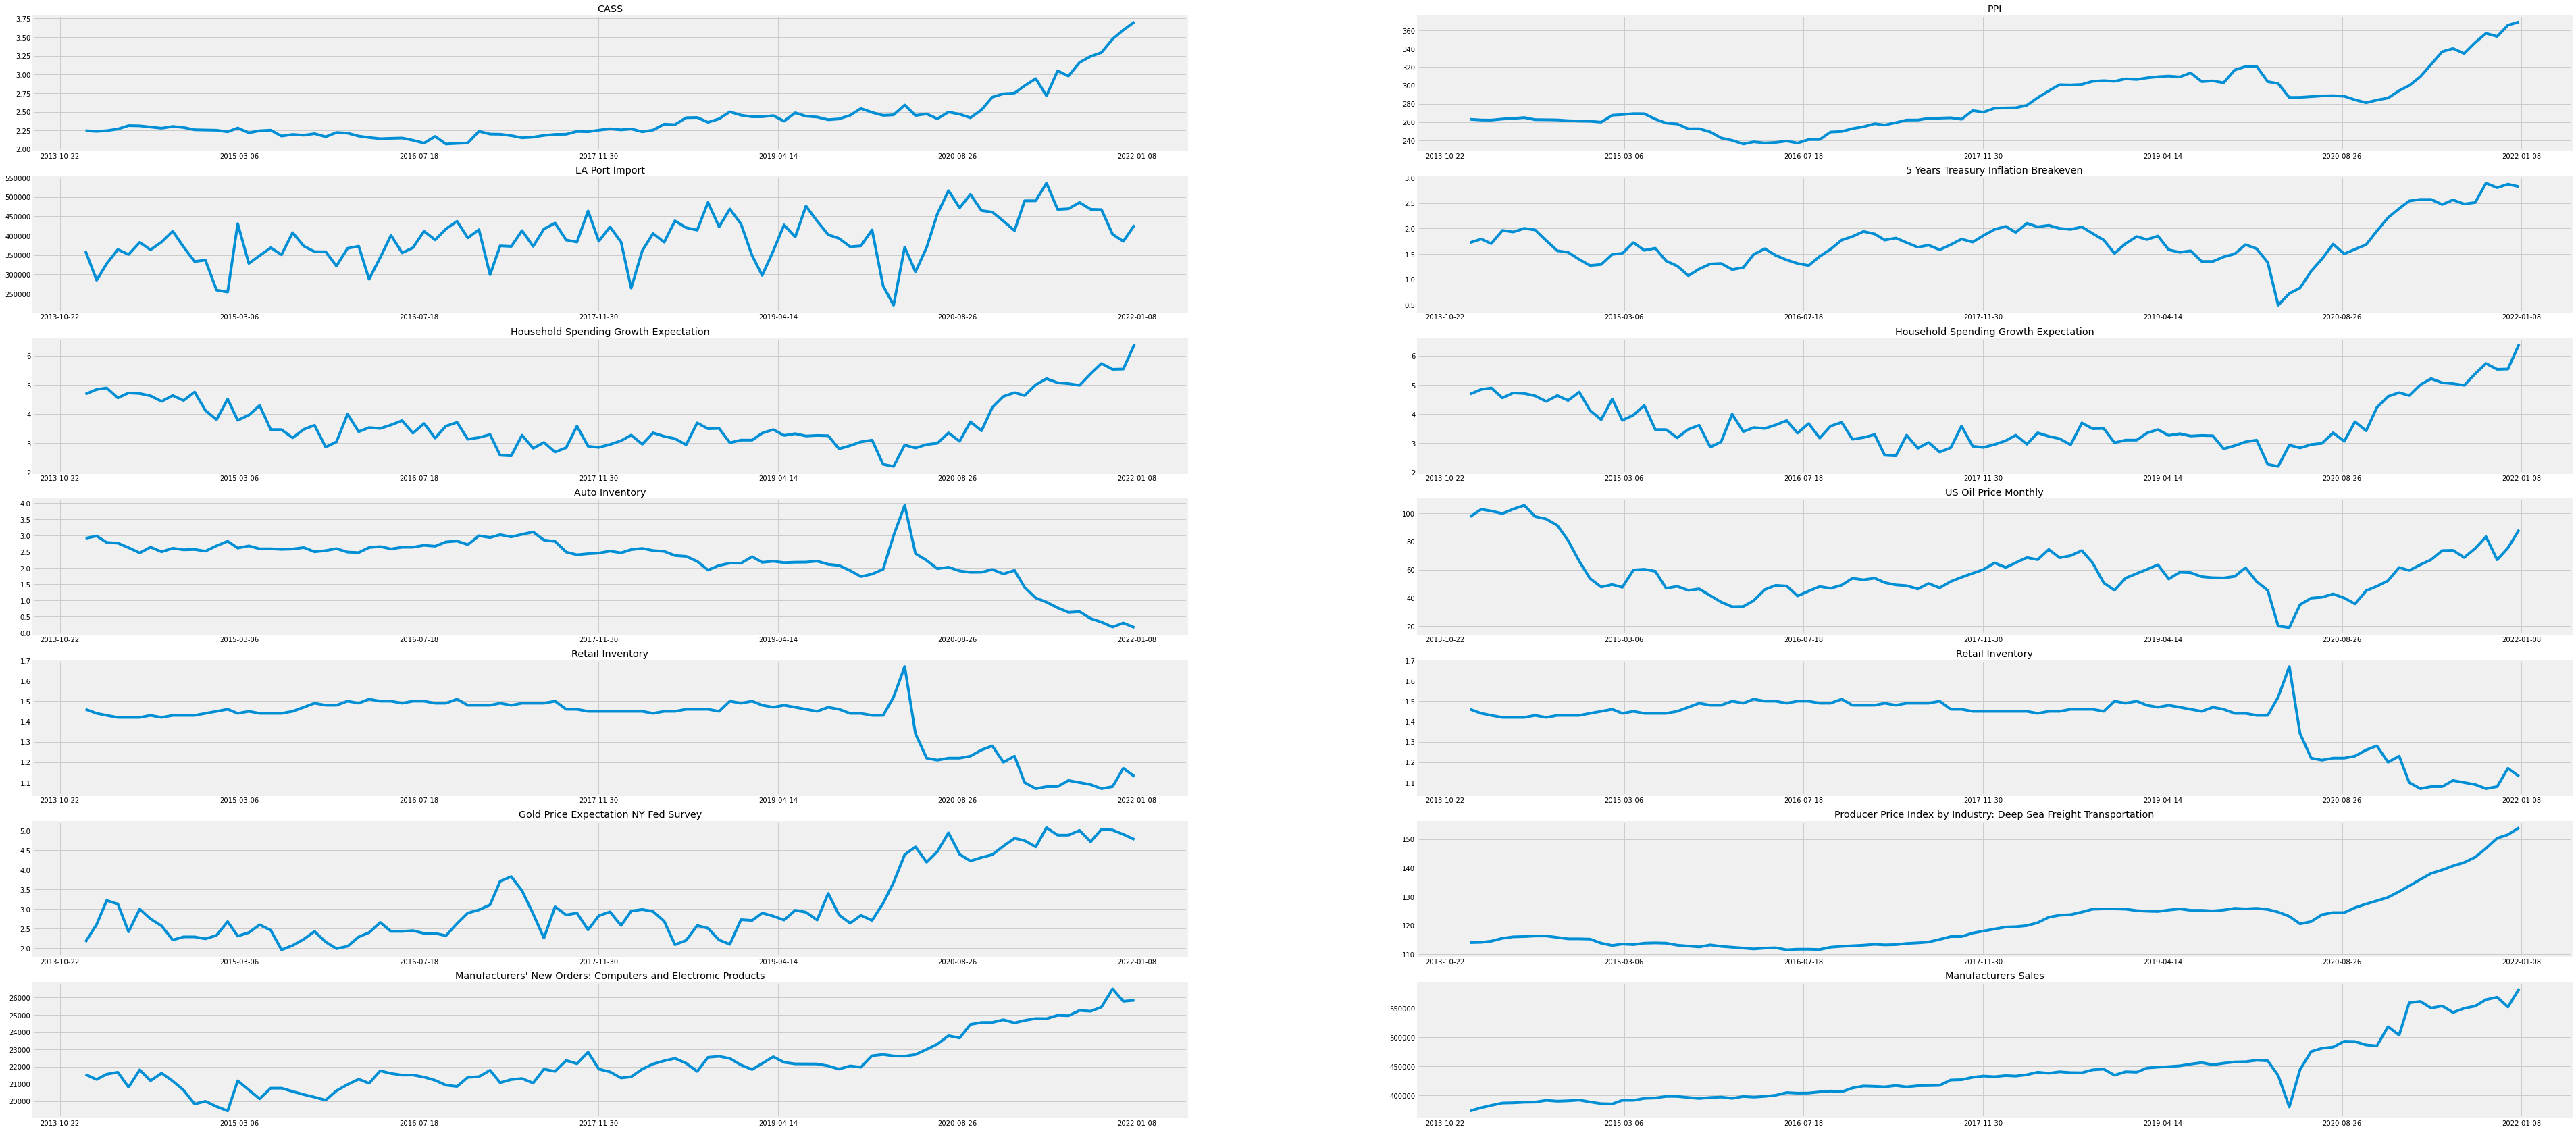

In [243]:
fig, ((axs1,axs2),(axs3,axs4),(axs5,axs6),(axs7,axs8),(axs9,axs10),(axs11,axs12),(axs13,axs14)) = plt.subplots(7, 2, figsize=(60,30))
axl = [axs1,axs2,axs3,axs4,axs5,axs6,axs7,axs8,axs9,axs10,axs11,axs12,axs13,axs14]
axs1.plot(CASS['Date'], CASS.iloc[:,1])
axs1.set_title('CASS')
axs2.plot(PPI['DATE'], PPI.iloc[:,1])
axs2.set_title('PPI')
axs3.plot(CASS['Date'], CASS.iloc[:,2])
axs3.set_title('LA Port Import')
axs4.plot(PPI['DATE'], PPI.iloc[:,2])
axs4.set_title('5 Years Treasury Inflation Breakeven')
axs5.plot(CASS['Date'], CASS.iloc[:,4])
axs5.set_title('Household Spending Growth Expectation')
axs6.plot(PPI['DATE'], PPI.iloc[:,3])
axs6.set_title('Household Spending Growth Expectation')
axs7.plot(CASS['Date'], CASS.iloc[:,3])
axs7.set_title('Auto Inventory')
axs8.plot(PPI['DATE'], PPI.iloc[:,4])
axs8.set_title('US Oil Price Monthly')
axs9.plot(CASS['Date'], CASS.iloc[:,5])
axs9.set_title('Retail Inventory')
axs10.plot(PPI['DATE'], PPI.iloc[:,5])
axs10.set_title('Retail Inventory')
axs11.plot(CASS['Date'], CASS.iloc[:,6])
axs11.set_title('Gold Price Expectation NY Fed Survey')
axs12.plot(PPI['DATE'], PPI.iloc[:,6])
axs12.set_title('Producer Price Index by Industry: Deep Sea Freight Transportation')
axs13.plot(CASS['Date'], CASS.iloc[:,7])
axs13.set_title('Manufacturers\' New Orders: Computers and Electronic Products')
axs14.plot(PPI['DATE'], PPI.iloc[:,7])
axs14.set_title('Manufacturers Sales')
for i in axl :
    i.xaxis.set_minor_locator(AutoMinorLocator())
    i.xaxis.set_major_locator(AutoLocator())
    i.yaxis.set_minor_locator(AutoMinorLocator())
plt.show

array([[<AxesSubplot:title={'center':'LAP'}>,
        <AxesSubplot:title={'center':'AUTOINVP'}>],
       [<AxesSubplot:title={'center':'HHP'}>,
        <AxesSubplot:title={'center':'RETAILINVP'}>],
       [<AxesSubplot:title={'center':'GoldP'}>,
        <AxesSubplot:title={'center':'ComputerP'}>]], dtype=object)

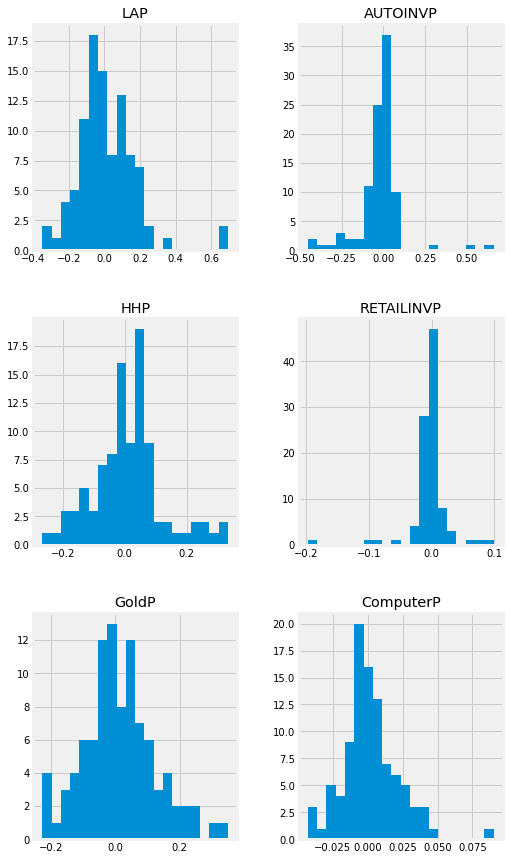

In [244]:
CASS.iloc[:,8:14].hist(bins=20,figsize=(7.5,15))

array([[<AxesSubplot:title={'center':'LAP'}>,
        <AxesSubplot:title={'center':'AUTOINVP'}>],
       [<AxesSubplot:title={'center':'HHP'}>,
        <AxesSubplot:title={'center':'RETAILINVP'}>],
       [<AxesSubplot:title={'center':'GoldP'}>,
        <AxesSubplot:title={'center':'ComputerP'}>]], dtype=object)

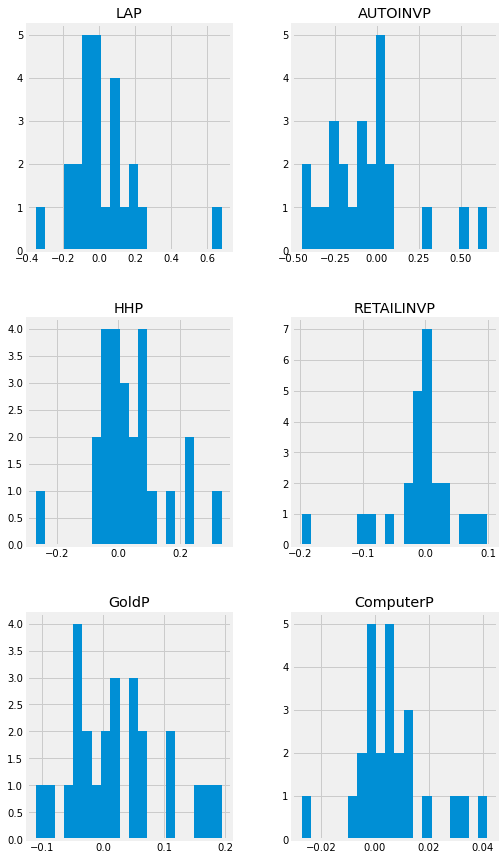

In [245]:
CASS[CASS['Date'] >= '2020-01-1'].iloc[:,8:14].hist(bins=20,figsize=(7.5,15))

array([[<AxesSubplot:title={'center':'T5YIEP'}>,
        <AxesSubplot:title={'center':'HHP'}>],
       [<AxesSubplot:title={'center':'USOILP'}>,
        <AxesSubplot:title={'center':'RETAILINVP'}>],
       [<AxesSubplot:title={'center':'TRUCKP'}>,
        <AxesSubplot:title={'center':'MFSP'}>]], dtype=object)

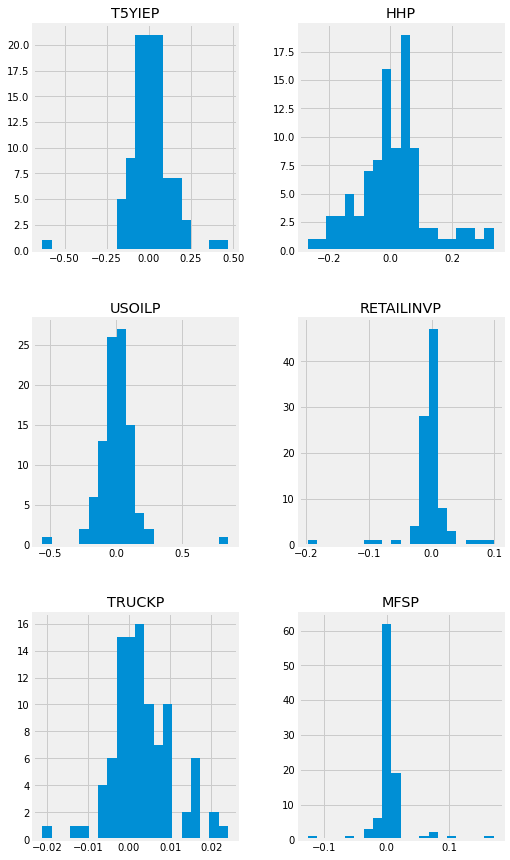

In [246]:
PPI.iloc[:,8:14].hist(bins=20,figsize=(7.5,15))

array([[<AxesSubplot:title={'center':'T5YIEP'}>,
        <AxesSubplot:title={'center':'HHP'}>],
       [<AxesSubplot:title={'center':'USOILP'}>,
        <AxesSubplot:title={'center':'RETAILINVP'}>],
       [<AxesSubplot:title={'center':'TRUCKP'}>,
        <AxesSubplot:title={'center':'MFSP'}>]], dtype=object)

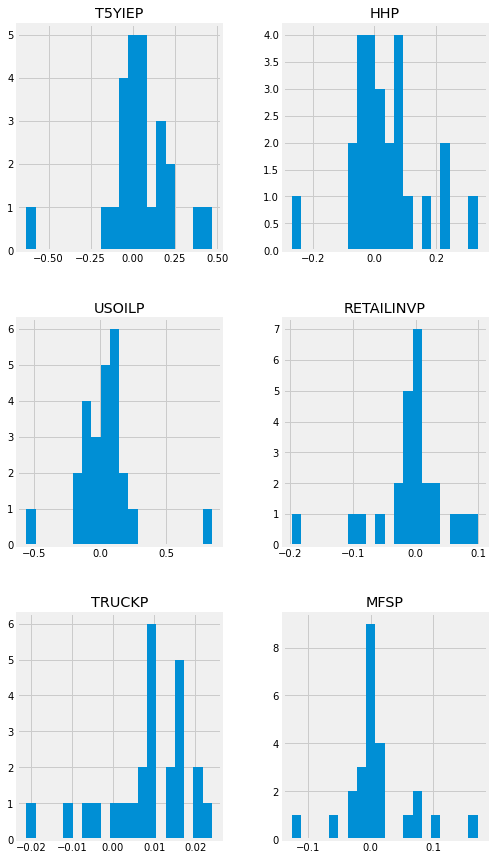

In [247]:
PPI[PPI['DATE'] >= '2020-01-1'].iloc[:,8:14].hist(bins=20,figsize=(7.5,15))

In [248]:
CASSN = pd.DataFrame(data={'Variable':['LA','AUTOINV','HH','RETAILINV','GOLD','COMPUTER']})
CASSL = pd.DataFrame(columns=['CASS CI'])
for i in range(8,14):
    ci = st.t.interval(alpha=0.95, df=len(CASS.iloc[:,i])-1, loc=np.mean(CASS.iloc[:,i]), scale=st.sem(CASS.iloc[:,i]))
    CASSL.loc[len(CASSL),'CASS CI'] = ci
CASSL =  pd.concat((CASSL,CASSN),axis=1)
CASSL

CASS CI   Variable
0    (-0.019152488543654894, 0.04781228235808789)         LA
1    (-0.04707184018745826, 0.009397613383334547)    AUTOINV
2    (-0.013286511507344728, 0.03204733624961277)         HH
3    (-0.00840740076153839, 0.004149668802775503)  RETAILINV
4       (-0.008441408344051, 0.03728883102446337)       GOLD
5  (-0.0020122670378784563, 0.006168968068806292)   COMPUTER

In [249]:
CASSN = pd.DataFrame(data={'Variable':['LA','AUTOINV','HH','RETAILINV','GOLD','COMPUTER']})
CASSL = pd.DataFrame(columns=['CASS CI'])
for i in range(8,14):
    ci = st.t.interval(alpha=0.95, df=len(CASS[CASS['Date'] >= '2020-01-1'].iloc[:,i])-1, 
        loc=np.mean(CASS[CASS['Date'] >= '2020-01-1'].iloc[:,i]), 
        scale=st.sem(CASS[CASS['Date'] >= '2020-01-1'].iloc[:,i]))
    CASSL.loc[len(CASSL),'CASS CI'] = ci
CASSL =  pd.concat((CASSL,CASSN),axis=1)
CASSL

CASS CI   Variable
0   (-0.058122077004327685, 0.10037007700432769)         LA
1   (-0.16503103514498818, 0.054135035144988186)    AUTOINV
2   (-0.012335941278929327, 0.08598394127892933)         HH
3   (-0.03257126648570823, 0.016947266485708233)  RETAILINV
4   (-0.008456194078478384, 0.05631219407847838)       GOLD
5  (0.0008352733924322639, 0.012420726607567736)   COMPUTER

In [250]:
PPIN = pd.DataFrame(data={'Variable':['T5YIE','HH','USOIL','RETAILINV','TRUCK','MFS']})
PPIL = pd.DataFrame(columns=['PPI CI'])
for i in range(8,14):
    ci = st.t.interval(alpha=0.95, df=len(PPI.iloc[:,i])-1, loc=np.mean(PPI.iloc[:,i]), scale=st.sem(PPI.iloc[:,i]))
    PPIL.loc[len(PPIL),'PPI CI'] = ci
PPIL =  pd.concat((PPIL,PPIN),axis=1)
PPIL

PPI CI   Variable
0    (-0.010998894439096274, 0.03909786351126122)      T5YIE
1    (-0.013286511507344728, 0.03204733624961277)         HH
2    (-0.019882279294931672, 0.03741423805781828)      USOIL
3    (-0.00840740076153839, 0.004149668802775503)  RETAILINV
4   (0.0016669498423547288, 0.004568101704037024)      TRUCK
5  (-0.0007368739579051917, 0.010784296638317563)        MFS

In [251]:
PPIN = pd.DataFrame(data={'Variable':['T5YIE','HH','USOIL','RETAILINV','TRUCK','MFS']})
PPIL = pd.DataFrame(columns=['PPI CI'])
for i in range(8,14):
    ci = st.t.interval(alpha=0.95, df=len(PPI[PPI['DATE'] >= '2020-01-1'].iloc[:,i])-1, 
        loc=np.mean(PPI[PPI['DATE'] >= '2020-01-1'].iloc[:,i]), 
        scale=st.sem(PPI[PPI['DATE'] >= '2020-01-1'].iloc[:,i]))
    PPIL.loc[len(PPIL),'PPI CI'] = ci
PPIL =  pd.concat((PPIL,PPIN),axis=1)
PPIL

PPI CI   Variable
0   (-0.037013337763510186, 0.12870933776351018)      T5YIE
1   (-0.012335941278929327, 0.08598394127892933)         HH
2      (-0.05603851817879898, 0.136526518178799)      USOIL
3   (-0.03257126648570823, 0.016947266485708233)  RETAILINV
4   (0.003822695466301776, 0.012505304533698223)      TRUCK
5  (-0.011666030804220089, 0.034066030804220084)        MFS

## Projection
In this phase, we will try to project the value of each variable using guidance from the descriptive summary above. We will make 4 different scenario for each <br>
Each scenario will have 5 phases (Except Auto and Retail Inventory):
- Plateau up
- Plateau down
- Acceleration to The Normal
- Deceleration to The Normal
- Deceleration in The Normal

In [252]:
CASSA = CASS.drop(list(CASS)[8:14],axis=1)
CASSB = CASS.drop(list(CASS)[8:14],axis=1)
CASSC = CASS.drop(list(CASS)[8:14],axis=1)
CASSD = CASS.drop(list(CASS)[8:14],axis=1)
PPIA = PPI.drop(list(PPI)[8:14],axis=1)
PPIB = PPI.drop(list(PPI)[8:14],axis=1)
PPIC = PPI.drop(list(PPI)[8:14],axis=1)
PPID = PPI.drop(list(PPI)[8:14],axis=1)

### Projection of CASS
For the first part we will try to project CASS first, the assumption for each is included below

### CASS A (In Percent)
1. LA = 3.3, 1.1, -1.2, -1.5, 1.8
2. AUTOINV = 30, 15, 5, 4, 3.5
3. HH = 0.5, -1, -3.95, -2.95, -1.95
4. RETAILINV = 1.5, 1.1, 1.1, 0.8, 0.4
5. Gold = 0.75, -0.9, -3, -1.5, -0.3
6. Computer= 0.25, 0.15, 0.05, 0.025, 0.015

In [253]:
for i in range(97,121):
    CASSA.loc[i,:] = np.nan

In [254]:

LAP = [3.3, 1.1, -1.2, -1.5, 1.8]
AUTOINVP = [30, 15, 5, 4, 3.5]
HHP = [0.5, -1, -3.95, -2.95, -1.95]
RETAILINVP = [1.5, 1.1, 1.1, 0.8, 0.4]
GoldP = [0.75, -0.9, -3, -1.5, -0.3]
ComputerP = [0.25, 0.15, 0.05, 0.025, 0.015]

for i in range(97,121) :
    if i < 103 :
        CASSA.iloc[i,0] = CASSA.iloc[(i-1),0] + relativedelta(months=+1)
        CASSA.iloc[i,2] = CASSA.iloc[(i-1),2] * (1+LAP[0]/100)
        CASSA.iloc[i,3] = CASSA.iloc[(i-1),3] * (1+AUTOINVP[0]/100)
        CASSA.iloc[i,4] = CASSA.iloc[(i-1),4] * (1+HHP[0]/100)
        CASSA.iloc[i,5] = CASSA.iloc[(i-1),5] * (1+RETAILINVP[0]/100)
        CASSA.iloc[i,6] = CASSA.iloc[(i-1),6] * (1+GoldP[0]/100)
        CASSA.iloc[i,7] = CASSA.iloc[(i-1),7] * (1+ComputerP[0]/100)
    elif 102 < i < 106:
        CASSA.iloc[i,0] = CASSA.iloc[(i-1),0] + relativedelta(months=+1)
        CASSA.iloc[i,2] = CASSA.iloc[(i-1),2] * (1+LAP[1]/100)
        CASSA.iloc[i,3] = CASSA.iloc[(i-1),3] * (1+AUTOINVP[1]/100)
        CASSA.iloc[i,4] = CASSA.iloc[(i-1),4] * (1+HHP[1]/100)
        CASSA.iloc[i,5] = CASSA.iloc[(i-1),5] * (1+RETAILINVP[1]/100)
        CASSA.iloc[i,6] = CASSA.iloc[(i-1),6] * (1+GoldP[1]/100)
        CASSA.iloc[i,7] = CASSA.iloc[(i-1),7] * (1+ComputerP[1]/100)
    elif 105 < i < 109:
        CASSA.iloc[i,0] = CASSA.iloc[(i-1),0] + relativedelta(months=+1)
        CASSA.iloc[i,2] = CASSA.iloc[(i-1),2] * (1+LAP[2]/100)
        CASSA.iloc[i,3] = CASSA.iloc[(i-1),3] * (1+AUTOINVP[2]/100)
        CASSA.iloc[i,4] = CASSA.iloc[(i-1),4] * (1+HHP[2]/100)
        CASSA.iloc[i,5] = CASSA.iloc[(i-1),5] * (1+RETAILINVP[2]/100)
        CASSA.iloc[i,6] = CASSA.iloc[(i-1),6] * (1+GoldP[2]/100)
        CASSA.iloc[i,7] = CASSA.iloc[(i-1),7] * (1+ComputerP[2]/100)
    elif 108 < i < 115:
        CASSA.iloc[i,0] = CASSA.iloc[(i-1),0] + relativedelta(months=+1)
        CASSA.iloc[i,2] = CASSA.iloc[(i-1),2] * (1+LAP[3]/100)
        CASSA.iloc[i,3] = CASSA.iloc[(i-1),3] * (1+AUTOINVP[3]/100)
        CASSA.iloc[i,4] = CASSA.iloc[(i-1),4] * (1+HHP[3]/100)
        CASSA.iloc[i,5] = CASSA.iloc[(i-1),5] * (1+RETAILINVP[3]/100)
        CASSA.iloc[i,6] = CASSA.iloc[(i-1),6] * (1+GoldP[3]/100)
        CASSA.iloc[i,7] = CASSA.iloc[(i-1),7] * (1+ComputerP[3]/100)
    elif 114 < i < 121:
        CASSA.iloc[i,0] = CASSA.iloc[(i-1),0] + relativedelta(months=+1)
        CASSA.iloc[i,2] = CASSA.iloc[(i-1),2] * (1+LAP[4]/100)
        CASSA.iloc[i,3] = CASSA.iloc[(i-1),3] * (1+AUTOINVP[4]/100)
        CASSA.iloc[i,4] = CASSA.iloc[(i-1),4] * (1+HHP[4]/100)
        CASSA.iloc[i,5] = CASSA.iloc[(i-1),5] * (1+RETAILINVP[4]/100)
        CASSA.iloc[i,6] = CASSA.iloc[(i-1),6] * (1+GoldP[4]/100)
        CASSA.iloc[i,7] = CASSA.iloc[(i-1),7] * (1+ComputerP[4]/100)

In [255]:
CASSA.tail(30)

Date   CASS             LA   AUTOINV        HH  RETAILINV      Gold  \
91  2021-08-01  3.161  485672.150000  0.661000  4.980000   1.100000  5.010000   
92  2021-09-01  3.242  468059.150000  0.448000  5.380000   1.090000  4.720000   
93  2021-10-01  3.294  467286.650000  0.338000  5.730000   1.070000  5.040000   
94  2021-11-01  3.475  403443.900000  0.188000  5.530000   1.080000  5.020000   
95  2021-12-01  3.596  385250.700000  0.312000  5.540000   1.170000  4.910000   
96  2022-01-01  3.704  427207.700000  0.171000  6.390000   1.130000  4.780000   
97  2022-02-01    NaN  441305.554100  0.222300  6.421950   1.146950  4.815850   
98  2022-03-01    NaN  455868.637385  0.288990  6.454060   1.164154  4.851969   
99  2022-04-01    NaN  470912.302419  0.375687  6.486330   1.181617  4.888359   
100 2022-05-01    NaN  486452.408399  0.488393  6.518762   1.199341  4.925021   
101 2022-06-01    NaN  502505.337876  0.634911  6.551356   1.217331  4.961959   
102 2022-07-01    NaN  519088.014026  0.825384  6.584112   1.235591  4.999174   
103 2022-08-01    NaN  524797.982180  0.949192  6.518271   1.249182  4.954181   
104 2022-09-01    NaN  530570.759984  1.091571  6.453088   1.262923  4.909593   
105 2022-10-01    NaN  536407.038344  1.255306  6.388558   1.276816  4.865407   
106 2022-11-01    NaN  529970.153884  1.318072  6.136210   1.290861  4.719445   
107 2022-12-01    NaN  523610.512037  1.383975  5.893829   1.305060  4.577862   
108 2023-01-01    NaN  517327.185893  1.453174  5.661023   1.319416  4.440526   
109 2023-02-01    NaN  509567.278104  1.511301  5.494023   1.329971  4.373918   
110 2023-03-01    NaN  501923.768933  1.571753  5.331949   1.340611  4.308309   
111 2023-04-01    NaN  494394.912399  1.634623  5.174657   1.351336  4.243684   
112 2023-05-01    NaN  486978.988713  1.700008  5.022004   1.362146  4.180029   
113 2023-06-01    NaN  479674.303882  1.768008  4.873855   1.373043  4.117329   
114 2023-07-01    NaN  472479.189324  1.838729  4.730076   1.384028  4.055569   
115 2023-08-01    NaN  480983.814732  1.903084  4.637840   1.389564  4.043402   
116 2023-09-01    NaN  489641.523397  1.969692  4.547402   1.395122  4.031272   
117 2023-10-01    NaN  498455.070818  2.038631  4.458728   1.400703  4.019178   
118 2023-11-01    NaN  507427.262093  2.109984  4.371783   1.406305  4.007121   
119 2023-12-01    NaN  516560.952811  2.183833  4.286533   1.411931  3.995099   
120 2024-01-01    NaN  525859.049961  2.260267  4.202945   1.417578  3.983114   

         Computer  
91   25255.000000  
92   25211.000000  
93   25449.000000  
94   26508.000000  
95   25788.000000  
96   25846.000000  
97   25910.615000  
98   25975.391537  
99   26040.330016  
100  26105.430841  
101  26170.694418  
102  26236.121155  
103  26275.475336  
104  26314.888549  
105  26354.360882  
106  26367.538063  
107  26380.721832  
108  26393.912192  
109  26400.510671  
110  26407.110798  
111  26413.712576  
112  26420.316004  
113  26426.921083  
114  26433.527813  
115  26437.492842  
116  26441.458466  
117  26445.424685  
118  26449.391499  
119  26453.358908  
120  26457.326911

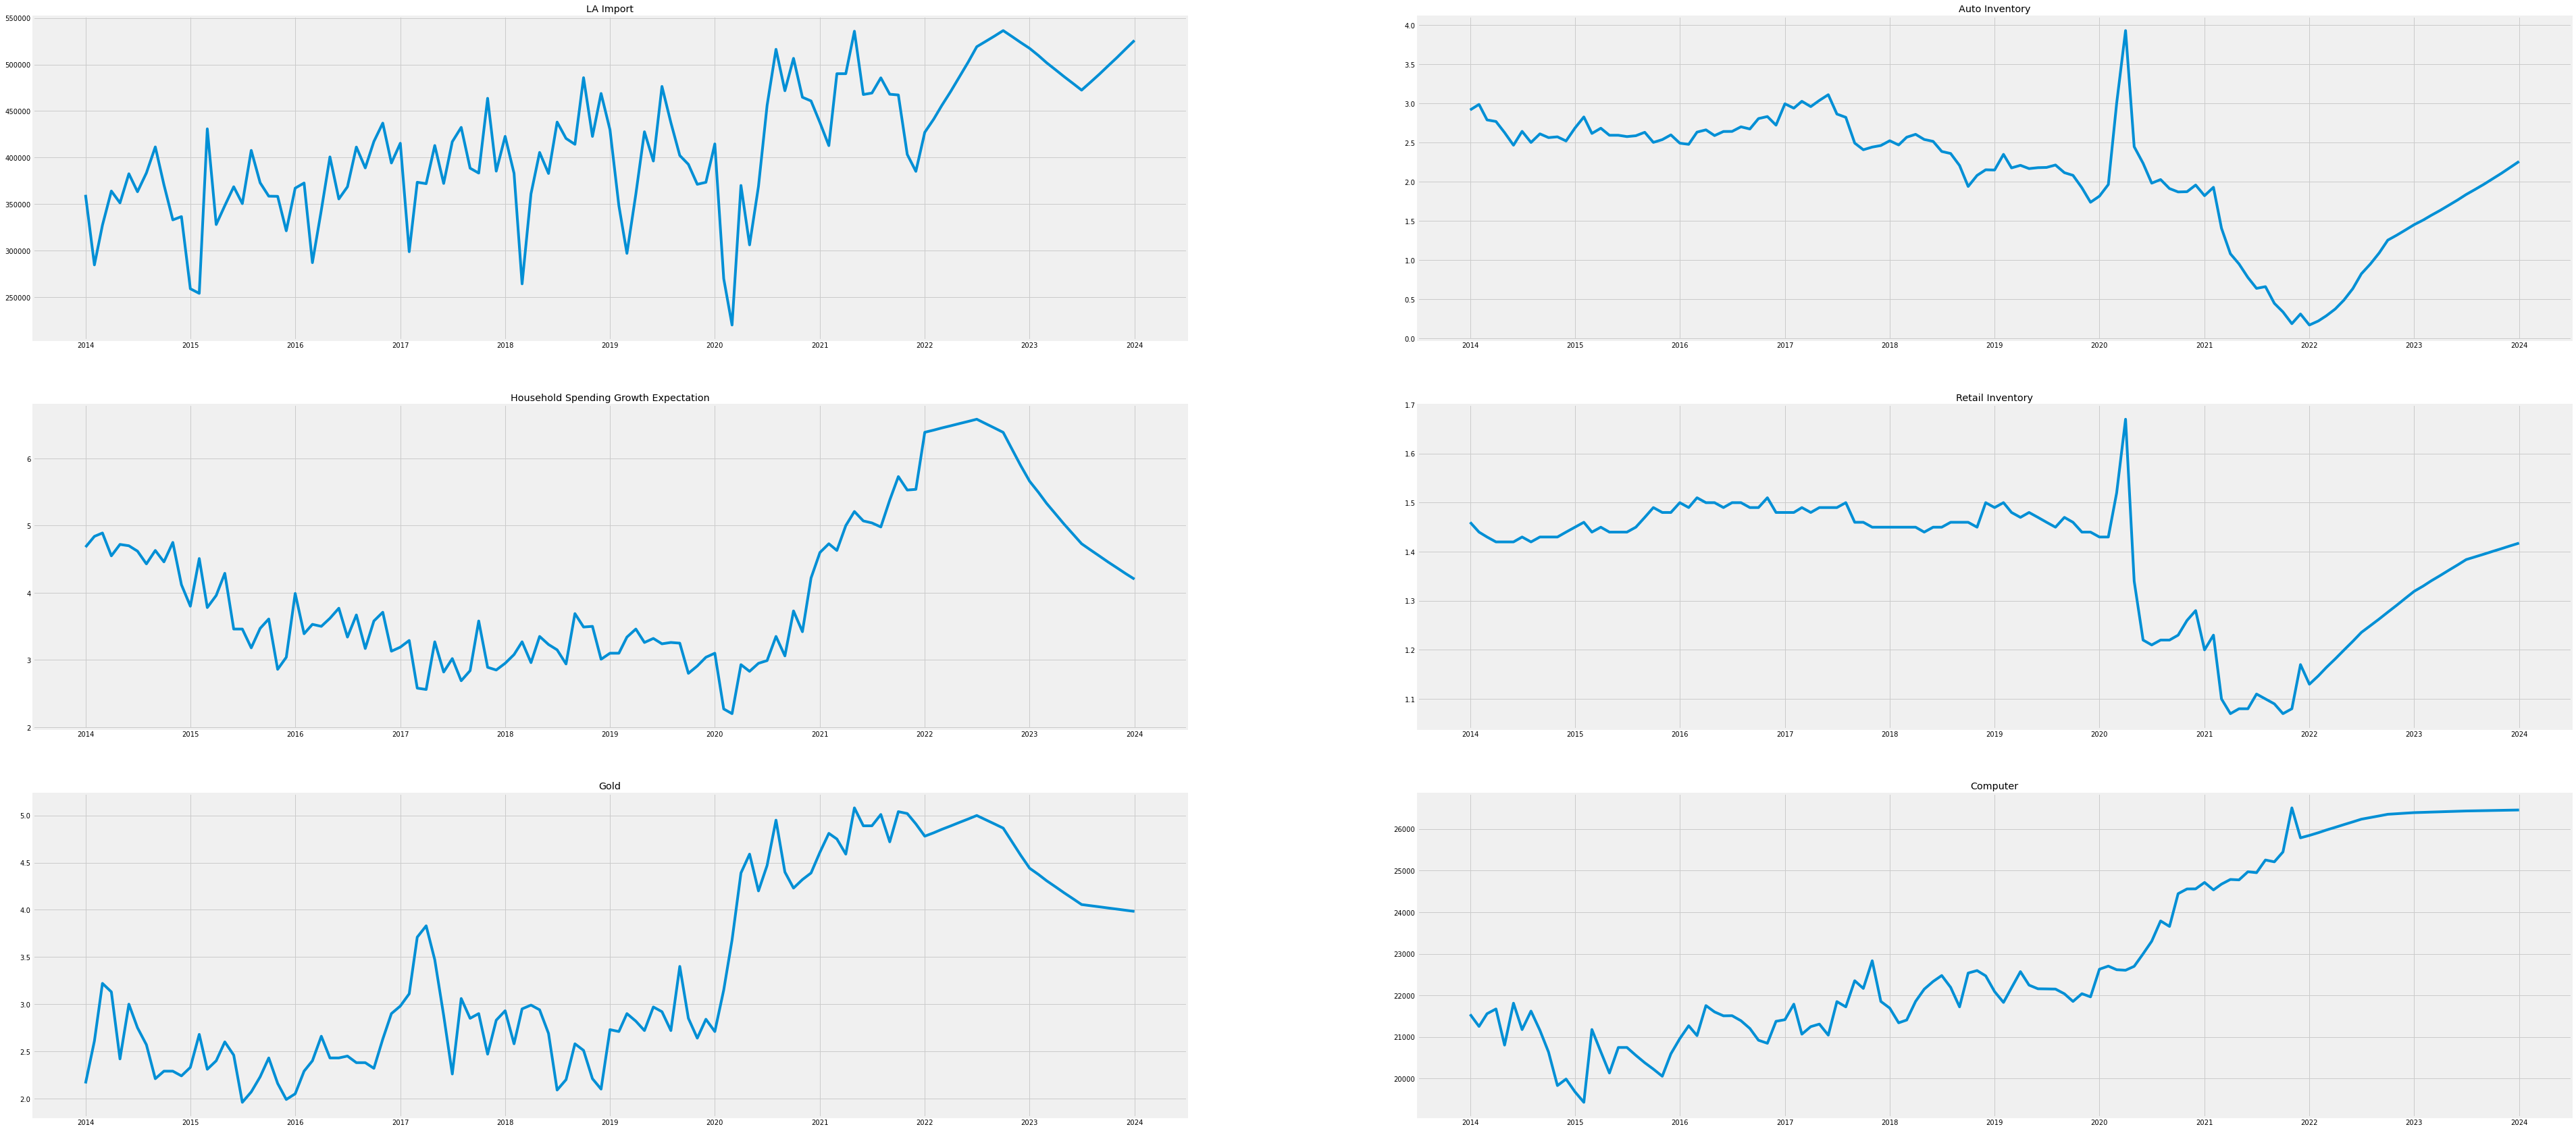

In [256]:
fig, axs =  plt.subplots(3, 2, figsize=(60,30))
axs[0,0].plot(CASSA['Date'],CASSA.iloc[:,2])
axs[0,0].set_title('LA Import')
axs[0,1].plot(CASSA['Date'],CASSA.iloc[:,3])
axs[0,1].set_title('Auto Inventory')
axs[1,0].plot(CASSA['Date'],CASSA.iloc[:,4])
axs[1,0].set_title('Household Spending Growth Expectation')
axs[1,1].plot(CASSA['Date'],CASSA.iloc[:,5])
axs[1,1].set_title('Retail Inventory')
axs[2,0].plot(CASSA['Date'],CASSA.iloc[:,6])
axs[2,0].set_title('Gold')
axs[2,1].plot(CASSA['Date'],CASSA.iloc[:,7])
axs[2,1].set_title('Computer')
plt.show()

### CASS B (In Percent)
1. LA = 3.3, 1.1, -1.2, -1.5, 1.8
2. AUTOINV = 25, 12.5, 4.5, 3.75, 3.25
3. HH = 0.6, -0.9, -3.45, -2.65, -1.65
4. RETAILINV = 1.425, 1.05, 1.05, 0.75, 0.375
5. Gold = 1, -0.8, -2.75, -1.25, -0.25
6. Computer= 0.25, 0.15, 0.05, 0.025, 0.015

In [257]:
for i in range(97,121):
    CASSB.loc[i,:] = np.nan

In [258]:
LAP = [3.3, 1.1, -1.2, -1.5, 1.8]
AUTOINVP = [25, 12.5, 4.5, 3.75, 3.25]
HHP = [0.6, -0.9, -3.45, -2.65, -1.65]
RETAILINVP = [1.425, 1.05, 1.05, 0.75, 0.375]
GoldP = [1, -0.8, -2.75, -1.25, -0.25]
ComputerP = [0.25, 0.15, 0.05, 0.025, 0.015]

for i in range(97,121) :
    if i < 103 :
        CASSB.iloc[i,0] = CASSB.iloc[(i-1),0] + relativedelta(months=+1)
        CASSB.iloc[i,2] = CASSB.iloc[(i-1),2] * (1+LAP[0]/100)
        CASSB.iloc[i,3] = CASSB.iloc[(i-1),3] * (1+AUTOINVP[0]/100)
        CASSB.iloc[i,4] = CASSB.iloc[(i-1),4] * (1+HHP[0]/100)
        CASSB.iloc[i,5] = CASSB.iloc[(i-1),5] * (1+RETAILINVP[0]/100)
        CASSB.iloc[i,6] = CASSB.iloc[(i-1),6] * (1+GoldP[0]/100)
        CASSB.iloc[i,7] = CASSB.iloc[(i-1),7] * (1+ComputerP[0]/100)
    elif 102 < i < 106:
        CASSB.iloc[i,0] = CASSB.iloc[(i-1),0] + relativedelta(months=+1)
        CASSB.iloc[i,2] = CASSB.iloc[(i-1),2] * (1+LAP[1]/100)
        CASSB.iloc[i,3] = CASSB.iloc[(i-1),3] * (1+AUTOINVP[1]/100)
        CASSB.iloc[i,4] = CASSB.iloc[(i-1),4] * (1+HHP[1]/100)
        CASSB.iloc[i,5] = CASSB.iloc[(i-1),5] * (1+RETAILINVP[1]/100)
        CASSB.iloc[i,6] = CASSB.iloc[(i-1),6] * (1+GoldP[1]/100)
        CASSB.iloc[i,7] = CASSB.iloc[(i-1),7] * (1+ComputerP[1]/100)
    elif 105 < i < 109:
        CASSB.iloc[i,0] = CASSB.iloc[(i-1),0] + relativedelta(months=+1)
        CASSB.iloc[i,2] = CASSB.iloc[(i-1),2] * (1+LAP[2]/100)
        CASSB.iloc[i,3] = CASSB.iloc[(i-1),3] * (1+AUTOINVP[2]/100)
        CASSB.iloc[i,4] = CASSB.iloc[(i-1),4] * (1+HHP[2]/100)
        CASSB.iloc[i,5] = CASSB.iloc[(i-1),5] * (1+RETAILINVP[2]/100)
        CASSB.iloc[i,6] = CASSB.iloc[(i-1),6] * (1+GoldP[2]/100)
        CASSB.iloc[i,7] = CASSB.iloc[(i-1),7] * (1+ComputerP[2]/100)
    elif 108 < i < 115:
        CASSB.iloc[i,0] = CASSB.iloc[(i-1),0] + relativedelta(months=+1)
        CASSB.iloc[i,2] = CASSB.iloc[(i-1),2] * (1+LAP[3]/100)
        CASSB.iloc[i,3] = CASSB.iloc[(i-1),3] * (1+AUTOINVP[3]/100)
        CASSB.iloc[i,4] = CASSB.iloc[(i-1),4] * (1+HHP[3]/100)
        CASSB.iloc[i,5] = CASSB.iloc[(i-1),5] * (1+RETAILINVP[3]/100)
        CASSB.iloc[i,6] = CASSB.iloc[(i-1),6] * (1+GoldP[3]/100)
        CASSB.iloc[i,7] = CASSB.iloc[(i-1),7] * (1+ComputerP[3]/100)
    elif 114 < i < 121:
        CASSB.iloc[i,0] = CASSB.iloc[(i-1),0] + relativedelta(months=+1)
        CASSB.iloc[i,2] = CASSB.iloc[(i-1),2] * (1+LAP[4]/100)
        CASSB.iloc[i,3] = CASSB.iloc[(i-1),3] * (1+AUTOINVP[4]/100)
        CASSB.iloc[i,4] = CASSB.iloc[(i-1),4] * (1+HHP[4]/100)
        CASSB.iloc[i,5] = CASSB.iloc[(i-1),5] * (1+RETAILINVP[4]/100)
        CASSB.iloc[i,6] = CASSB.iloc[(i-1),6] * (1+GoldP[4]/100)
        CASSB.iloc[i,7] = CASSB.iloc[(i-1),7] * (1+ComputerP[4]/100)

In [259]:
CASSB.tail(20)

Date  CASS             LA   AUTOINV        HH  RETAILINV      Gold  \
101 2022-06-01   NaN  502505.337876  0.521851  6.584014   1.212840  5.023828   
102 2022-07-01   NaN  519088.014026  0.652313  6.623518   1.230123  5.074066   
103 2022-08-01   NaN  524797.982180  0.733852  6.563907   1.243039  5.033474   
104 2022-09-01   NaN  530570.759984  0.825584  6.504832   1.256091  4.993206   
105 2022-10-01   NaN  536407.038344  0.928782  6.446288   1.269280  4.953260   
106 2022-11-01   NaN  529970.153884  0.970577  6.223891   1.282608  4.817046   
107 2022-12-01   NaN  523610.512037  1.014253  6.009167   1.296075  4.684577   
108 2023-01-01   NaN  517327.185893  1.059894  5.801851   1.309684  4.555751   
109 2023-02-01   NaN  509567.278104  1.099641  5.648102   1.319506  4.498804   
110 2023-03-01   NaN  501923.768933  1.140877  5.498427   1.329403  4.442569   
111 2023-04-01   NaN  494394.912399  1.183660  5.352719   1.339373  4.387037   
112 2023-05-01   NaN  486978.988713  1.228047  5.210872   1.349419  4.332199   
113 2023-06-01   NaN  479674.303882  1.274099  5.072783   1.359539  4.278047   
114 2023-07-01   NaN  472479.189324  1.321878  4.938355   1.369736  4.224571   
115 2023-08-01   NaN  480983.814732  1.364839  4.856872   1.374872  4.214010   
116 2023-09-01   NaN  489641.523397  1.409196  4.776733   1.380028  4.203475   
117 2023-10-01   NaN  498455.070818  1.454995  4.697917   1.385203  4.192966   
118 2023-11-01   NaN  507427.262093  1.502282  4.620402   1.390398  4.182483   
119 2023-12-01   NaN  516560.952811  1.551106  4.544165   1.395612  4.172027   
120 2024-01-01   NaN  525859.049961  1.601517  4.469186   1.400845  4.161597   

         Computer  
101  26170.694418  
102  26236.121155  
103  26275.475336  
104  26314.888549  
105  26354.360882  
106  26367.538063  
107  26380.721832  
108  26393.912192  
109  26400.510671  
110  26407.110798  
111  26413.712576  
112  26420.316004  
113  26426.921083  
114  26433.527813  
115  26437.492842  
116  26441.458466  
117  26445.424685  
118  26449.391499  
119  26453.358908  
120  26457.326911

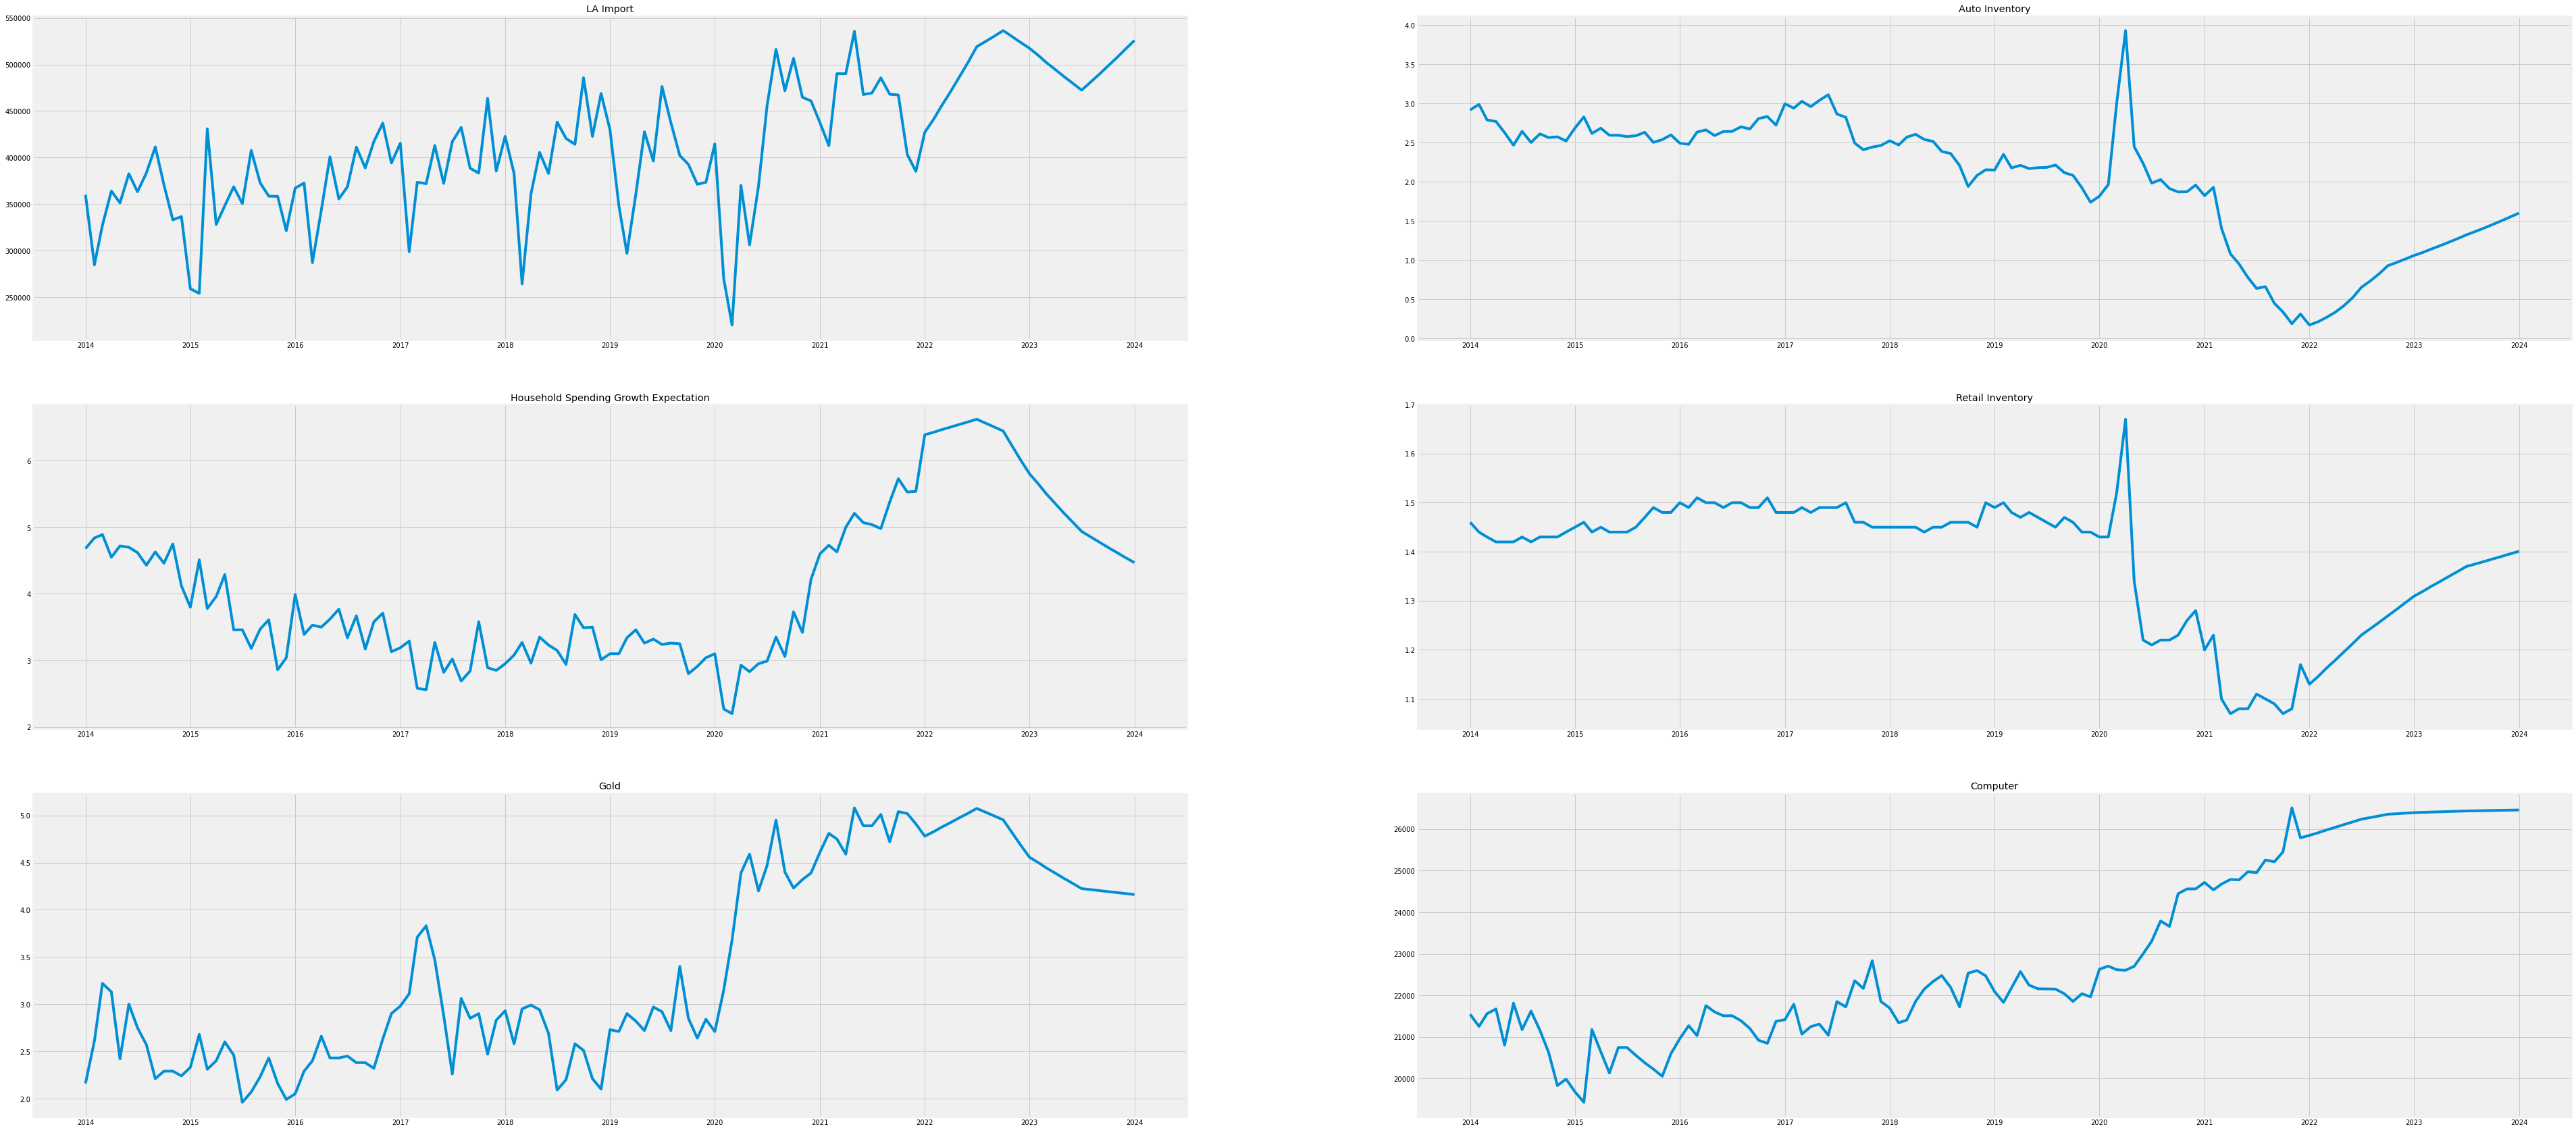

In [260]:
fig, axs =  plt.subplots(3, 2, figsize=(60,30))
axs[0,0].plot(CASSB['Date'],CASSB.iloc[:,2])
axs[0,0].set_title('LA Import')
axs[0,1].plot(CASSB['Date'],CASSB.iloc[:,3])
axs[0,1].set_title('Auto Inventory')
axs[1,0].plot(CASSB['Date'],CASSB.iloc[:,4])
axs[1,0].set_title('Household Spending Growth Expectation')
axs[1,1].plot(CASSB['Date'],CASSB.iloc[:,5])
axs[1,1].set_title('Retail Inventory')
axs[2,0].plot(CASSB['Date'],CASSB.iloc[:,6])
axs[2,0].set_title('Gold')
axs[2,1].plot(CASSB['Date'],CASSB.iloc[:,7])
axs[2,1].set_title('Computer')
plt.show()

### CASS C (In Percent)
1. LA = 3.3, 1.1, -1.2, -1.5, 1.8
2. AUTOINV = 22.5, 11.5, 4, 3.5, 3
3. HH = 0.7, -0.85, -3.35, -2.475, -1.5
4. RETAILINV = 1.385, 1, 1, 0.7, 0.35
5. Gold = 1.2, -0.6, -2, -1, -0.2
6. Computer= 0.25, 0.15, 0.05, 0.025, 0.015

In [261]:
for i in range(97,121):
    CASSC.loc[i,:] = np.nan

In [262]:
LAP = [3.3, 1.1, -1.2, -1.5, 1.8]
AUTOINVP = [22.5, 11.5, 4, 3.5, 3]
HHP = [0.7, -0.85, -3.35, -2.475, -1.5]
RETAILINVP = [1.385, 1, 1, 0.7, 0.35]
GoldP = [1.2, -0.6, -2, -1, -0.2]
ComputerP = [0.25, 0.15, 0.05, 0.025, 0.015]

for i in range(97,121) :
    if i < 103 :
        CASSC.iloc[i,0] = CASSC.iloc[(i-1),0] + relativedelta(months=+1)
        CASSC.iloc[i,2] = CASSC.iloc[(i-1),2] * (1+LAP[0]/100)
        CASSC.iloc[i,3] = CASSC.iloc[(i-1),3] * (1+AUTOINVP[0]/100)
        CASSC.iloc[i,4] = CASSC.iloc[(i-1),4] * (1+HHP[0]/100)
        CASSC.iloc[i,5] = CASSC.iloc[(i-1),5] * (1+RETAILINVP[0]/100)
        CASSC.iloc[i,6] = CASSC.iloc[(i-1),6] * (1+GoldP[0]/100)
        CASSC.iloc[i,7] = CASSC.iloc[(i-1),7] * (1+ComputerP[0]/100)
    elif 102 < i < 106:
        CASSC.iloc[i,0] = CASSC.iloc[(i-1),0] + relativedelta(months=+1)
        CASSC.iloc[i,2] = CASSC.iloc[(i-1),2] * (1+LAP[1]/100)
        CASSC.iloc[i,3] = CASSC.iloc[(i-1),3] * (1+AUTOINVP[1]/100)
        CASSC.iloc[i,4] = CASSC.iloc[(i-1),4] * (1+HHP[1]/100)
        CASSC.iloc[i,5] = CASSC.iloc[(i-1),5] * (1+RETAILINVP[1]/100)
        CASSC.iloc[i,6] = CASSC.iloc[(i-1),6] * (1+GoldP[1]/100)
        CASSC.iloc[i,7] = CASSC.iloc[(i-1),7] * (1+ComputerP[1]/100)
    elif 105 < i < 109:
        CASSC.iloc[i,0] = CASSC.iloc[(i-1),0] + relativedelta(months=+1)
        CASSC.iloc[i,2] = CASSC.iloc[(i-1),2] * (1+LAP[2]/100)
        CASSC.iloc[i,3] = CASSC.iloc[(i-1),3] * (1+AUTOINVP[2]/100)
        CASSC.iloc[i,4] = CASSC.iloc[(i-1),4] * (1+HHP[2]/100)
        CASSC.iloc[i,5] = CASSC.iloc[(i-1),5] * (1+RETAILINVP[2]/100)
        CASSC.iloc[i,6] = CASSC.iloc[(i-1),6] * (1+GoldP[2]/100)
        CASSC.iloc[i,7] = CASSC.iloc[(i-1),7] * (1+ComputerP[2]/100)
    elif 108 < i < 115:
        CASSC.iloc[i,0] = CASSC.iloc[(i-1),0] + relativedelta(months=+1)
        CASSC.iloc[i,2] = CASSC.iloc[(i-1),2] * (1+LAP[3]/100)
        CASSC.iloc[i,3] = CASSC.iloc[(i-1),3] * (1+AUTOINVP[3]/100)
        CASSC.iloc[i,4] = CASSC.iloc[(i-1),4] * (1+HHP[3]/100)
        CASSC.iloc[i,5] = CASSC.iloc[(i-1),5] * (1+RETAILINVP[3]/100)
        CASSC.iloc[i,6] = CASSC.iloc[(i-1),6] * (1+GoldP[3]/100)
        CASSC.iloc[i,7] = CASSC.iloc[(i-1),7] * (1+ComputerP[3]/100)
    elif 114 < i < 121:
        CASSC.iloc[i,0] = CASSC.iloc[(i-1),0] + relativedelta(months=+1)
        CASSC.iloc[i,2] = CASSC.iloc[(i-1),2] * (1+LAP[4]/100)
        CASSC.iloc[i,3] = CASSC.iloc[(i-1),3] * (1+AUTOINVP[4]/100)
        CASSC.iloc[i,4] = CASSC.iloc[(i-1),4] * (1+HHP[4]/100)
        CASSC.iloc[i,5] = CASSC.iloc[(i-1),5] * (1+RETAILINVP[4]/100)
        CASSC.iloc[i,6] = CASSC.iloc[(i-1),6] * (1+GoldP[4]/100)
        CASSC.iloc[i,7] = CASSC.iloc[(i-1),7] * (1+ComputerP[4]/100)

In [263]:
CASSC.tail(20)

Date  CASS             LA   AUTOINV        HH  RETAILINV      Gold  \
101 2022-06-01   NaN  502505.337876  0.471712  6.616803   1.210450  5.073766   
102 2022-07-01   NaN  519088.014026  0.577847  6.663121   1.227215  5.134651   
103 2022-08-01   NaN  524797.982180  0.644299  6.606484   1.239487  5.103844   
104 2022-09-01   NaN  530570.759984  0.718393  6.550329   1.251882  5.073221   
105 2022-10-01   NaN  536407.038344  0.801009  6.494651   1.264401  5.042781   
106 2022-11-01   NaN  529970.153884  0.833049  6.277080   1.277045  4.941926   
107 2022-12-01   NaN  523610.512037  0.866371  6.066798   1.289815  4.843087   
108 2023-01-01   NaN  517327.185893  0.901026  5.863561   1.302714  4.746225   
109 2023-02-01   NaN  509567.278104  0.932562  5.718437   1.311833  4.698763   
110 2023-03-01   NaN  501923.768933  0.965201  5.576906   1.321015  4.651775   
111 2023-04-01   NaN  494394.912399  0.998983  5.438878   1.330262  4.605258   
112 2023-05-01   NaN  486978.988713  1.033948  5.304265   1.339574  4.559205   
113 2023-06-01   NaN  479674.303882  1.070136  5.172985   1.348951  4.513613   
114 2023-07-01   NaN  472479.189324  1.107591  5.044953   1.358394  4.468477   
115 2023-08-01   NaN  480983.814732  1.140819  4.969279   1.363148  4.459540   
116 2023-09-01   NaN  489641.523397  1.175043  4.894740   1.367919  4.450621   
117 2023-10-01   NaN  498455.070818  1.210294  4.821319   1.372707  4.441720   
118 2023-11-01   NaN  507427.262093  1.246603  4.748999   1.377512  4.432836   
119 2023-12-01   NaN  516560.952811  1.284001  4.677764   1.382333  4.423971   
120 2024-01-01   NaN  525859.049961  1.322521  4.607598   1.387171  4.415123   

         Computer  
101  26170.694418  
102  26236.121155  
103  26275.475336  
104  26314.888549  
105  26354.360882  
106  26367.538063  
107  26380.721832  
108  26393.912192  
109  26400.510671  
110  26407.110798  
111  26413.712576  
112  26420.316004  
113  26426.921083  
114  26433.527813  
115  26437.492842  
116  26441.458466  
117  26445.424685  
118  26449.391499  
119  26453.358908  
120  26457.326911

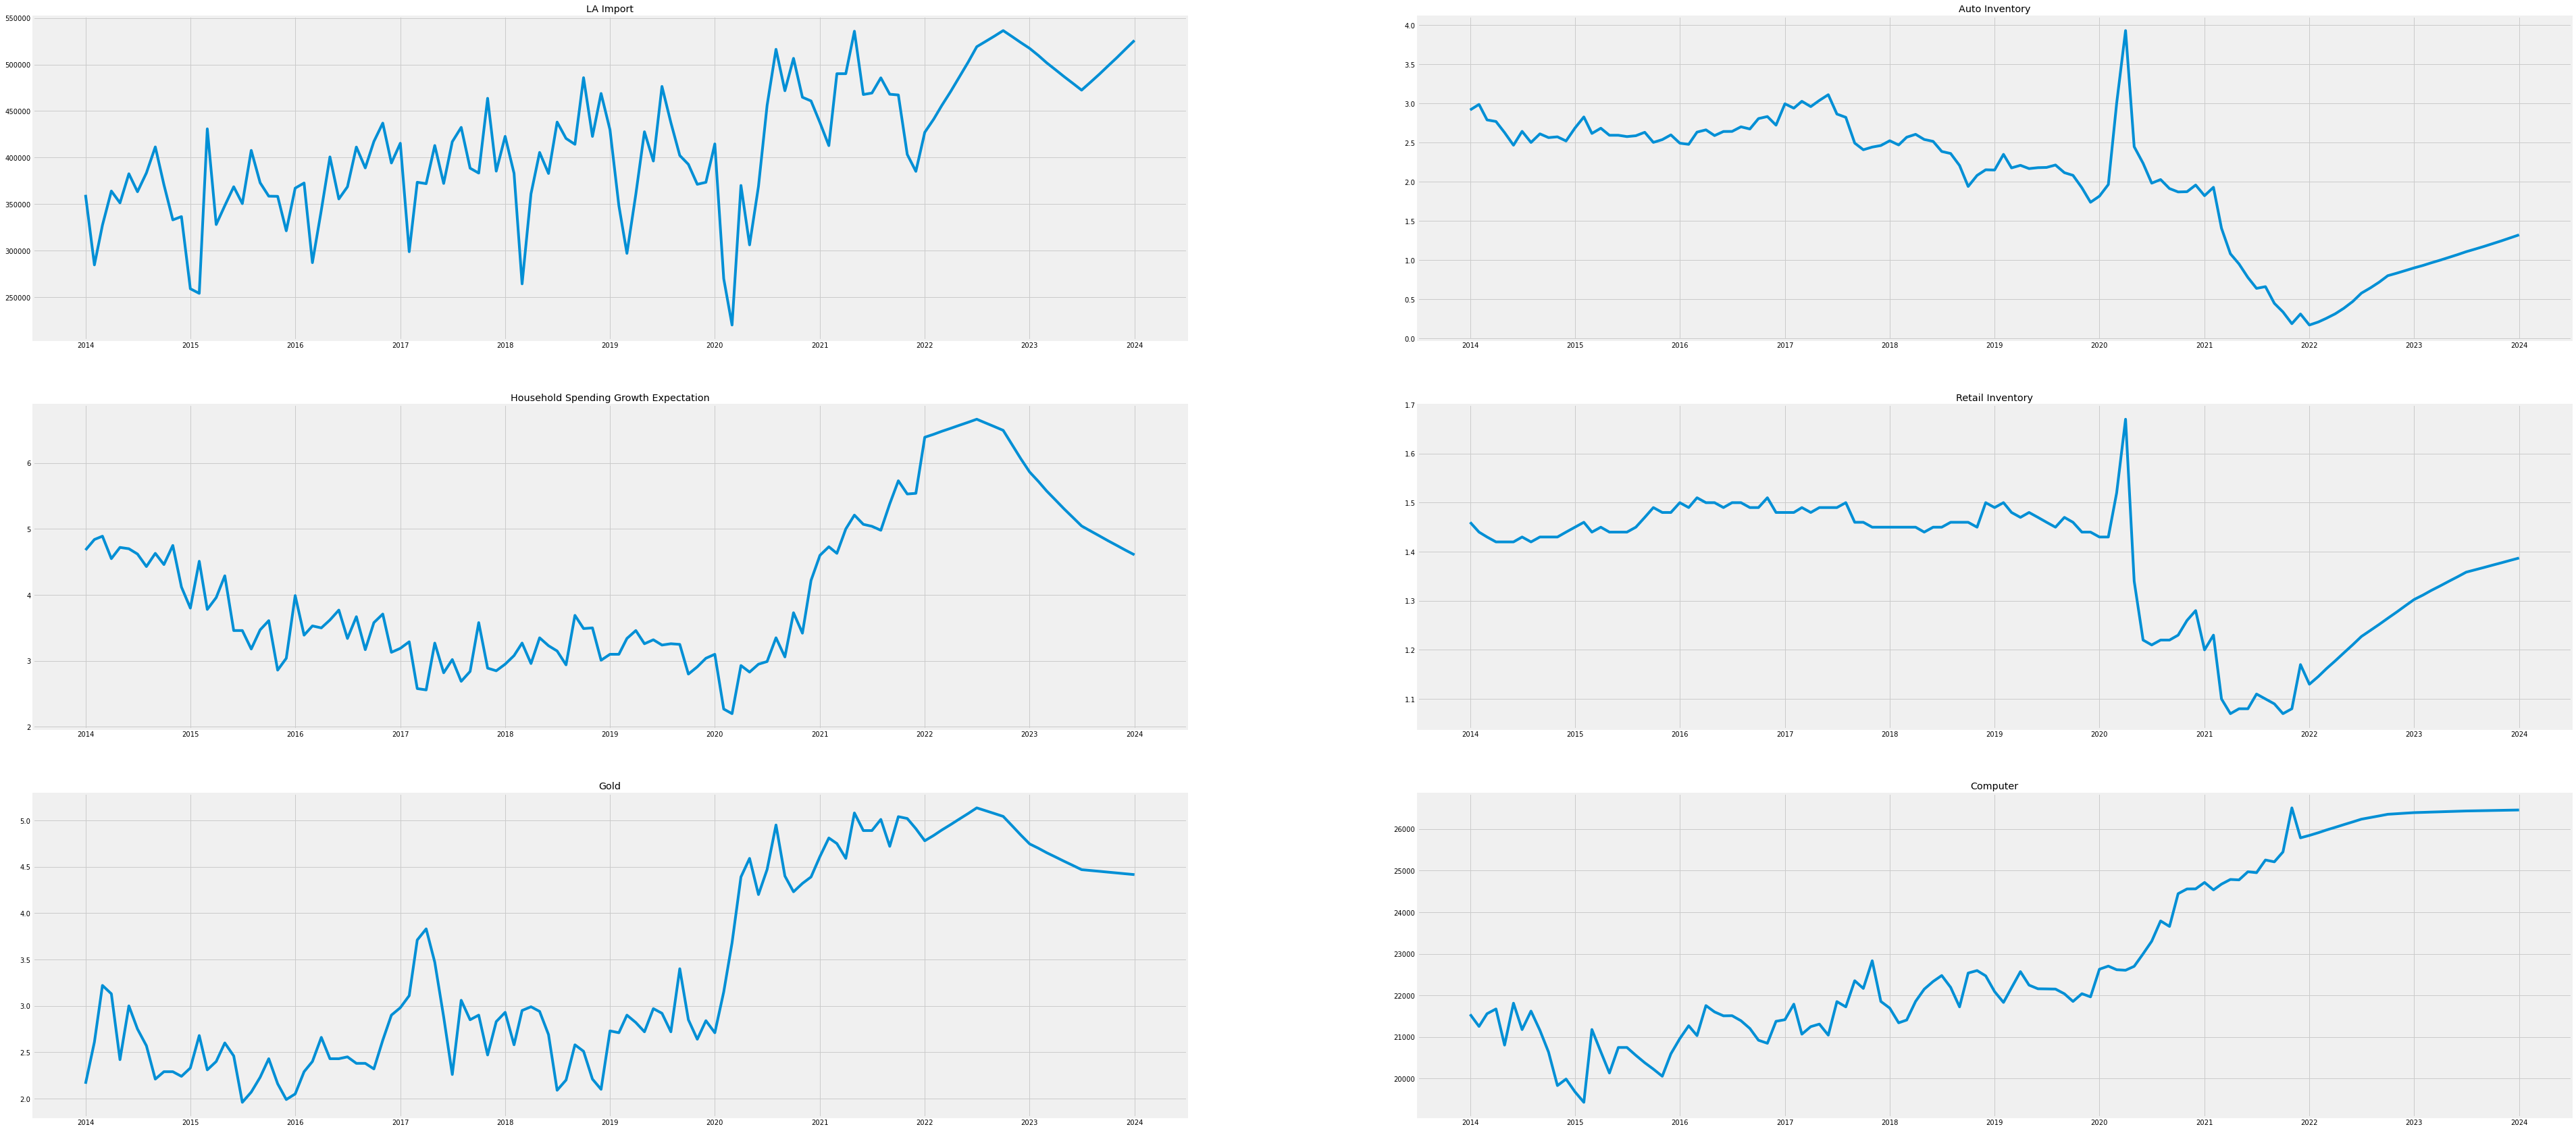

In [264]:
fig, axs =  plt.subplots(3, 2, figsize=(60,30))
axs[0,0].plot(CASSC['Date'],CASSC.iloc[:,2])
axs[0,0].set_title('LA Import')
axs[0,1].plot(CASSC['Date'],CASSC.iloc[:,3])
axs[0,1].set_title('Auto Inventory')
axs[1,0].plot(CASSC['Date'],CASSC.iloc[:,4])
axs[1,0].set_title('Household Spending Growth Expectation')
axs[1,1].plot(CASSC['Date'],CASSC.iloc[:,5])
axs[1,1].set_title('Retail Inventory')
axs[2,0].plot(CASSC['Date'],CASSC.iloc[:,6])
axs[2,0].set_title('Gold')
axs[2,1].plot(CASSC['Date'],CASSC.iloc[:,7])
axs[2,1].set_title('Computer')
plt.show()

### CASS D (In Percent)
1. LA = 3.3, 1.1, -1.2, -1.5, 1.8
2. AUTOINV = 20, 11, 4, 3.5, 3
3. HH = 0.8, -0.8, -3.115, -2.295, -1.3
4. RETAILINV = 1.345, 0.95, 0.95, 0.65, 0.3
5. Gold = 1.4, -0.4, -1.75, -0.75, -0.1
6. Computer= 0.25, 0.15, 0.05, 0.025, 0.015

In [265]:
for i in range(97,121):
    CASSD.loc[i,:] = np.nan

In [266]:
LAP = [3.3, 1.1, -1.2, -1.5, 1.8]
AUTOINVP = [20, 11, 3.5, 3.25, 2.75]
HHP = [0.8, -0.8, -3.115, -2.295, -1.3]
RETAILINVP = [1.345, 0.95, 0.95, 0.65, 0.3]
GoldP = [1.4, -0.4, -1.75, -0.75, -0.1]
ComputerP = [0.25, 0.15, 0.05, 0.025, 0.015]

for i in range(97,121) :
    if i < 103 :
        CASSD.iloc[i,0] = CASSD.iloc[(i-1),0] + relativedelta(months=+1)
        CASSD.iloc[i,2] = CASSD.iloc[(i-1),2] * (1+LAP[0]/100)
        CASSD.iloc[i,3] = CASSD.iloc[(i-1),3] * (1+AUTOINVP[0]/100)
        CASSD.iloc[i,4] = CASSD.iloc[(i-1),4] * (1+HHP[0]/100)
        CASSD.iloc[i,5] = CASSD.iloc[(i-1),5] * (1+RETAILINVP[0]/100)
        CASSD.iloc[i,6] = CASSD.iloc[(i-1),6] * (1+GoldP[0]/100)
        CASSD.iloc[i,7] = CASSD.iloc[(i-1),7] * (1+ComputerP[0]/100)
    elif 102 < i < 106:
        CASSD.iloc[i,0] = CASSD.iloc[(i-1),0] + relativedelta(months=+1)
        CASSD.iloc[i,2] = CASSD.iloc[(i-1),2] * (1+LAP[1]/100)
        CASSD.iloc[i,3] = CASSD.iloc[(i-1),3] * (1+AUTOINVP[1]/100)
        CASSD.iloc[i,4] = CASSD.iloc[(i-1),4] * (1+HHP[1]/100)
        CASSD.iloc[i,5] = CASSD.iloc[(i-1),5] * (1+RETAILINVP[1]/100)
        CASSD.iloc[i,6] = CASSD.iloc[(i-1),6] * (1+GoldP[1]/100)
        CASSD.iloc[i,7] = CASSD.iloc[(i-1),7] * (1+ComputerP[1]/100)
    elif 105 < i < 109:
        CASSD.iloc[i,0] = CASSD.iloc[(i-1),0] + relativedelta(months=+1)
        CASSD.iloc[i,2] = CASSD.iloc[(i-1),2] * (1+LAP[2]/100)
        CASSD.iloc[i,3] = CASSD.iloc[(i-1),3] * (1+AUTOINVP[2]/100)
        CASSD.iloc[i,4] = CASSD.iloc[(i-1),4] * (1+HHP[2]/100)
        CASSD.iloc[i,5] = CASSD.iloc[(i-1),5] * (1+RETAILINVP[2]/100)
        CASSD.iloc[i,6] = CASSD.iloc[(i-1),6] * (1+GoldP[2]/100)
        CASSD.iloc[i,7] = CASSD.iloc[(i-1),7] * (1+ComputerP[2]/100)
    elif 108 < i < 115:
        CASSD.iloc[i,0] = CASSD.iloc[(i-1),0] + relativedelta(months=+1)
        CASSD.iloc[i,2] = CASSD.iloc[(i-1),2] * (1+LAP[3]/100)
        CASSD.iloc[i,3] = CASSD.iloc[(i-1),3] * (1+AUTOINVP[3]/100)
        CASSD.iloc[i,4] = CASSD.iloc[(i-1),4] * (1+HHP[3]/100)
        CASSD.iloc[i,5] = CASSD.iloc[(i-1),5] * (1+RETAILINVP[3]/100)
        CASSD.iloc[i,6] = CASSD.iloc[(i-1),6] * (1+GoldP[3]/100)
        CASSD.iloc[i,7] = CASSD.iloc[(i-1),7] * (1+ComputerP[3]/100)
    elif 114 < i < 121:
        CASSD.iloc[i,0] = CASSD.iloc[(i-1),0] + relativedelta(months=+1)
        CASSD.iloc[i,2] = CASSD.iloc[(i-1),2] * (1+LAP[4]/100)
        CASSD.iloc[i,3] = CASSD.iloc[(i-1),3] * (1+AUTOINVP[4]/100)
        CASSD.iloc[i,4] = CASSD.iloc[(i-1),4] * (1+HHP[4]/100)
        CASSD.iloc[i,5] = CASSD.iloc[(i-1),5] * (1+RETAILINVP[4]/100)
        CASSD.iloc[i,6] = CASSD.iloc[(i-1),6] * (1+GoldP[4]/100)
        CASSD.iloc[i,7] = CASSD.iloc[(i-1),7] * (1+ComputerP[4]/100)

In [267]:
CASSD.tail(20)

Date  CASS             LA   AUTOINV        HH  RETAILINV      Gold  \
101 2022-06-01   NaN  502505.337876  0.425503  6.649722   1.208064  5.124101   
102 2022-07-01   NaN  519088.014026  0.510603  6.702920   1.224313  5.195838   
103 2022-08-01   NaN  524797.982180  0.566770  6.649297   1.235944  5.175055   
104 2022-09-01   NaN  530570.759984  0.629114  6.596102   1.247685  5.154355   
105 2022-10-01   NaN  536407.038344  0.698317  6.543334   1.259538  5.133737   
106 2022-11-01   NaN  529970.153884  0.722758  6.339509   1.271504  5.043897   
107 2022-12-01   NaN  523610.512037  0.748054  6.142033   1.283583  4.955629   
108 2023-01-01   NaN  517327.185893  0.774236  5.950709   1.295777  4.868905   
109 2023-02-01   NaN  509567.278104  0.799399  5.814140   1.304200  4.832388   
110 2023-03-01   NaN  501923.768933  0.825380  5.680706   1.312677  4.796146   
111 2023-04-01   NaN  494394.912399  0.852204  5.550333   1.321209  4.760174   
112 2023-05-01   NaN  486978.988713  0.879901  5.422953   1.329797  4.724473   
113 2023-06-01   NaN  479674.303882  0.908498  5.298496   1.338441  4.689040   
114 2023-07-01   NaN  472479.189324  0.938024  5.176896   1.347141  4.653872   
115 2023-08-01   NaN  480983.814732  0.963820  5.109596   1.351182  4.649218   
116 2023-09-01   NaN  489641.523397  0.990325  5.043172   1.355236  4.644569   
117 2023-10-01   NaN  498455.070818  1.017559  4.977610   1.359302  4.639924   
118 2023-11-01   NaN  507427.262093  1.045541  4.912901   1.363379  4.635284   
119 2023-12-01   NaN  516560.952811  1.074294  4.849034   1.367470  4.630649   
120 2024-01-01   NaN  525859.049961  1.103837  4.785996   1.371572  4.626018   

         Computer  
101  26170.694418  
102  26236.121155  
103  26275.475336  
104  26314.888549  
105  26354.360882  
106  26367.538063  
107  26380.721832  
108  26393.912192  
109  26400.510671  
110  26407.110798  
111  26413.712576  
112  26420.316004  
113  26426.921083  
114  26433.527813  
115  26437.492842  
116  26441.458466  
117  26445.424685  
118  26449.391499  
119  26453.358908  
120  26457.326911

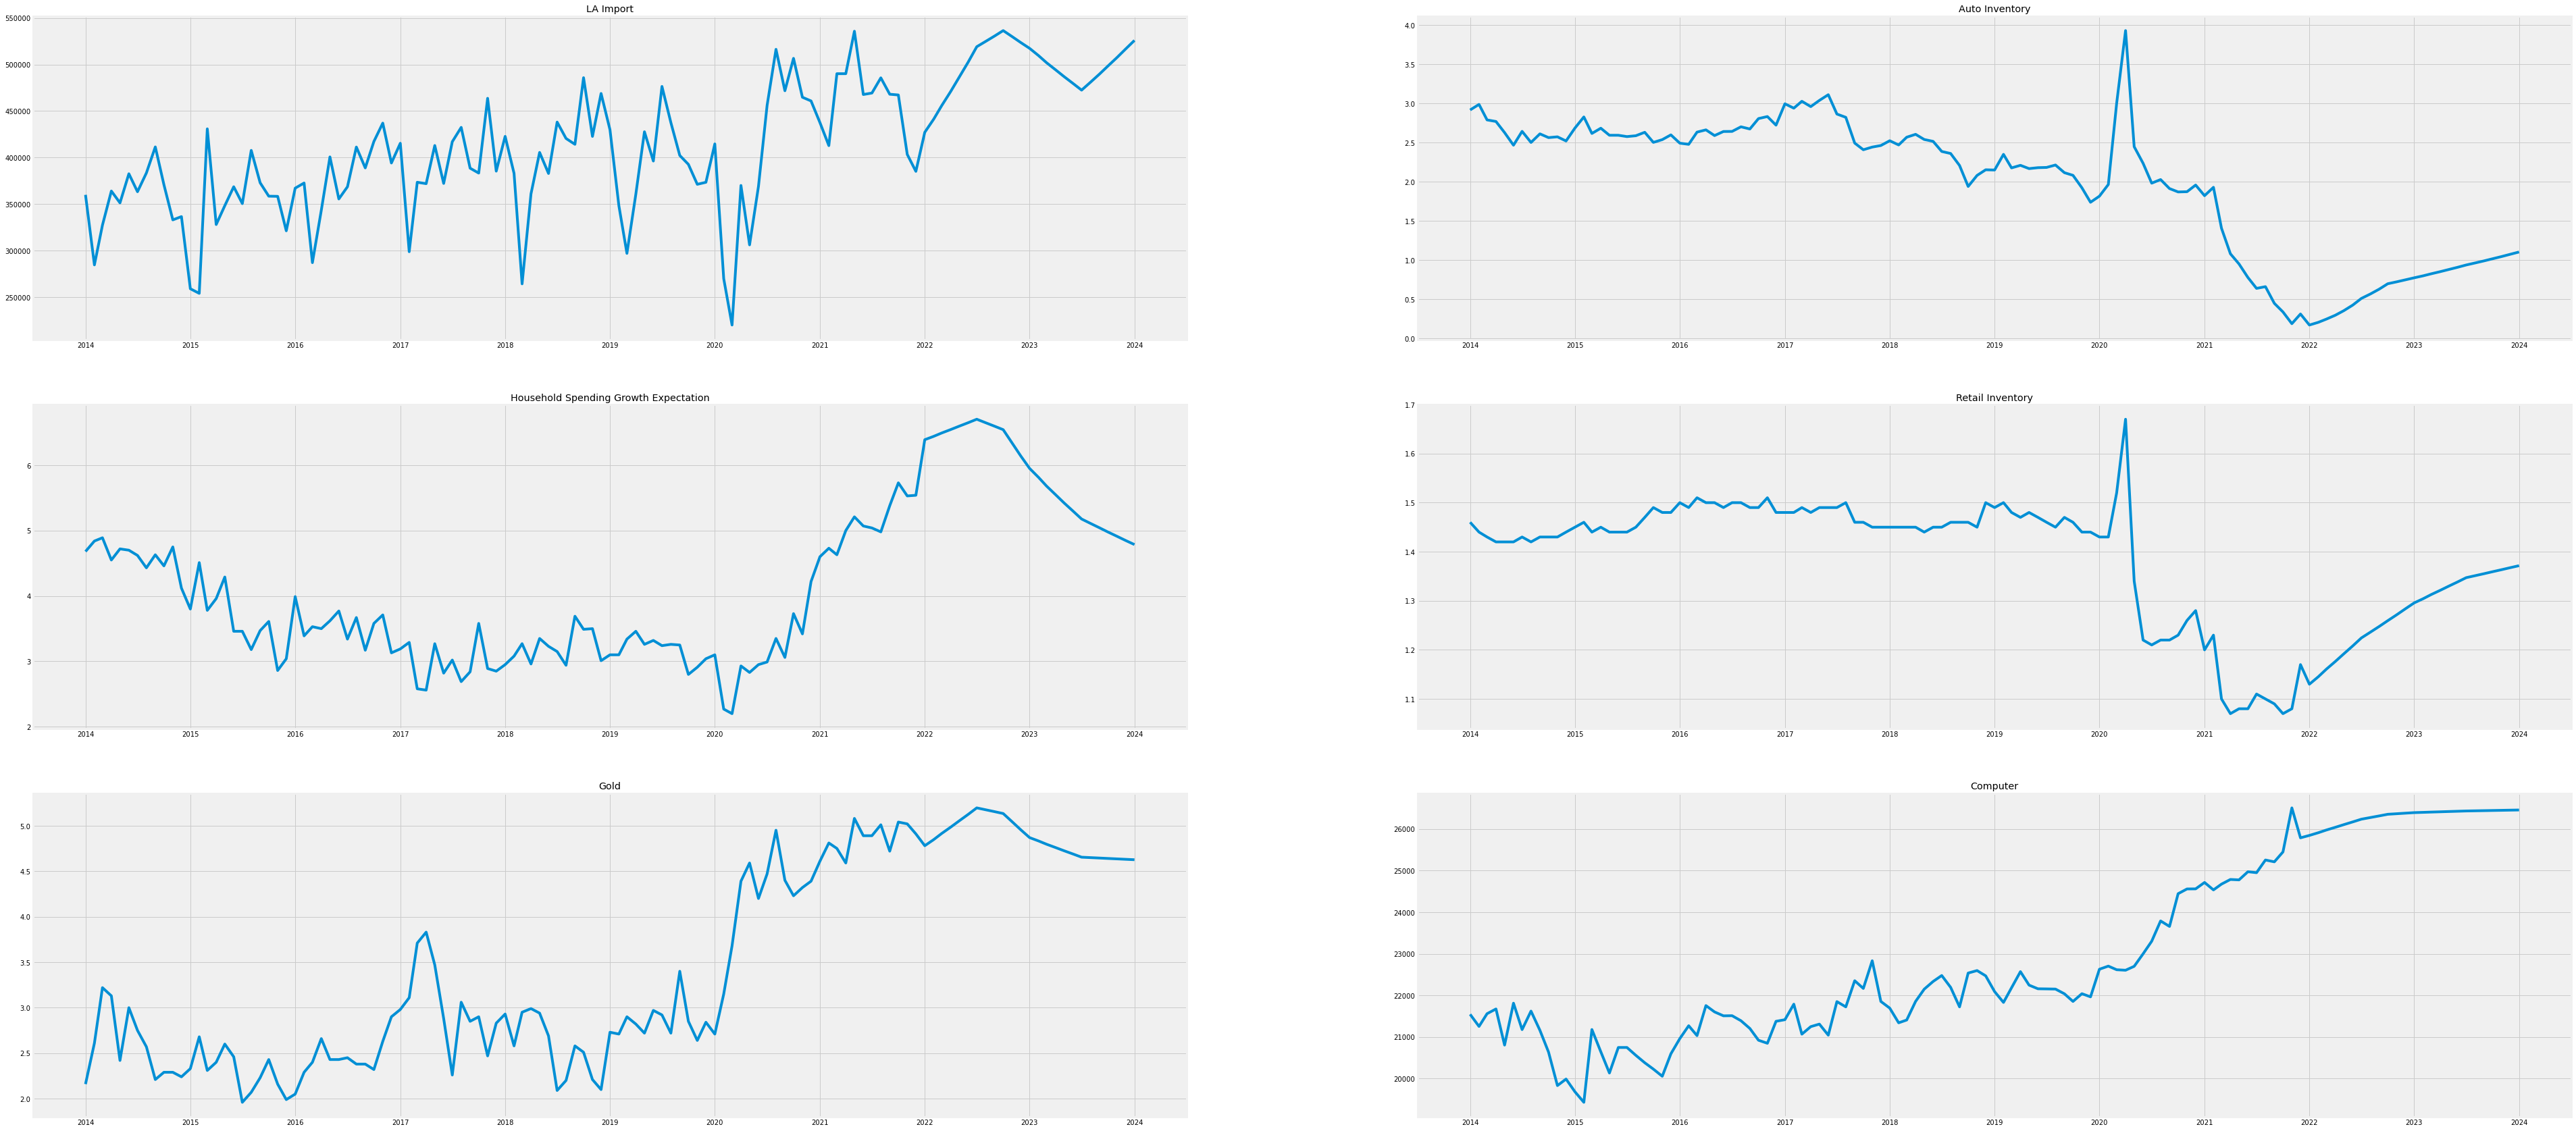

In [268]:
fig, axs =  plt.subplots(3, 2, figsize=(60,30))
axs[0,0].plot(CASSD['Date'],CASSD.iloc[:,2])
axs[0,0].set_title('LA Import')
axs[0,1].plot(CASSD['Date'],CASSD.iloc[:,3])
axs[0,1].set_title('Auto Inventory')
axs[1,0].plot(CASSD['Date'],CASSD.iloc[:,4])
axs[1,0].set_title('Household Spending Growth Expectation')
axs[1,1].plot(CASSD['Date'],CASSD.iloc[:,5])
axs[1,1].set_title('Retail Inventory')
axs[2,0].plot(CASSD['Date'],CASSD.iloc[:,6])
axs[2,0].set_title('Gold')
axs[2,1].plot(CASSD['Date'],CASSD.iloc[:,7])
axs[2,1].set_title('Computer')
plt.show()

### Projection of PPI
For the first part we will try to project PPI, the assumption for each is included below

### PPI A (In Percent)
1. T5YIE = 0.25, -0.95, -2.8, -2.2, -1.15
2. HH = 0.5, -1, -3.95, -2.95, -1.95
3. USOIL = 1.5, -1.25, -1.75, -1.45, -1.2
4. RETAILINV = 1.5, 1.1, 1.4, 1, 0.8
5. TRUCK = 0.75, -0.9, -2, -1.05, -0.7
6. MFS = 0.85, -1.15, -1.05, -0.65, -0.35

In [269]:
for i in range(97,121):
    PPIA.loc[i,:] = np.nan

In [270]:
T5YIEP = [0.25, -0.95, -2.8, -2.2, -1.15]
HHP = [0.5, -1, -3.95, -2.95, -1.95]
USOILP = [1.5, -1.25, -1.75, -1.45, -1.2]
RETAILINVP = [1.5, 1.1, 1.4, 1, 0.8]
TRUCKP = [0.75, -0.9, -2, -1.05, -0.7]
MFSP = [0.85, -1.15, -1.05, -0.65, -0.35]

for i in range(97,121) :
    if i < 103 :
        PPIA.iloc[i,0] = PPIA.iloc[(i-1),0] + relativedelta(months=+1)
        PPIA.iloc[i,2] = PPIA.iloc[(i-1),2] * (1+T5YIEP[0]/100)
        PPIA.iloc[i,3] = PPIA.iloc[(i-1),3] * (1+HHP[0]/100)
        PPIA.iloc[i,4] = PPIA.iloc[(i-1),4] * (1+USOILP[0]/100)
        PPIA.iloc[i,5] = PPIA.iloc[(i-1),5] * (1+RETAILINVP[0]/100)
        PPIA.iloc[i,6] = PPIA.iloc[(i-1),6] * (1+TRUCKP[0]/100)
        PPIA.iloc[i,7] = PPIA.iloc[(i-1),7] * (1+MFSP[0]/100)
    elif 102 < i < 106:
        PPIA.iloc[i,0] = PPIA.iloc[(i-1),0] + relativedelta(months=+1)
        PPIA.iloc[i,2] = PPIA.iloc[(i-1),2] * (1+T5YIEP[1]/100)
        PPIA.iloc[i,3] = PPIA.iloc[(i-1),3] * (1+HHP[1]/100)
        PPIA.iloc[i,4] = PPIA.iloc[(i-1),4] * (1+USOILP[1]/100)
        PPIA.iloc[i,5] = PPIA.iloc[(i-1),5] * (1+RETAILINVP[1]/100)
        PPIA.iloc[i,6] = PPIA.iloc[(i-1),6] * (1+TRUCKP[1]/100)
        PPIA.iloc[i,7] = PPIA.iloc[(i-1),7] * (1+MFSP[1]/100)
    elif 105 < i < 109:
        PPIA.iloc[i,0] = PPIA.iloc[(i-1),0] + relativedelta(months=+1)
        PPIA.iloc[i,2] = PPIA.iloc[(i-1),2] * (1+T5YIEP[2]/100)
        PPIA.iloc[i,3] = PPIA.iloc[(i-1),3] * (1+HHP[2]/100)
        PPIA.iloc[i,4] = PPIA.iloc[(i-1),4] * (1+USOILP[2]/100)
        PPIA.iloc[i,5] = PPIA.iloc[(i-1),5] * (1+RETAILINVP[2]/100)
        PPIA.iloc[i,6] = PPIA.iloc[(i-1),6] * (1+TRUCKP[2]/100)
        PPIA.iloc[i,7] = PPIA.iloc[(i-1),7] * (1+MFSP[2]/100)
    elif 108 < i < 115:
        PPIA.iloc[i,0] = PPIA.iloc[(i-1),0] + relativedelta(months=+1)
        PPIA.iloc[i,2] = PPIA.iloc[(i-1),2] * (1+T5YIEP[3]/100)
        PPIA.iloc[i,3] = PPIA.iloc[(i-1),3] * (1+HHP[3]/100)
        PPIA.iloc[i,4] = PPIA.iloc[(i-1),4] * (1+USOILP[3]/100)
        PPIA.iloc[i,5] = PPIA.iloc[(i-1),5] * (1+RETAILINVP[3]/100)
        PPIA.iloc[i,6] = PPIA.iloc[(i-1),6] * (1+TRUCKP[3]/100)
        PPIA.iloc[i,7] = PPIA.iloc[(i-1),7] * (1+MFSP[3]/100)
    elif 114 < i < 121:
        PPIA.iloc[i,0] = PPIA.iloc[(i-1),0] + relativedelta(months=+1)
        PPIA.iloc[i,2] = PPIA.iloc[(i-1),2] * (1+T5YIEP[4]/100)
        PPIA.iloc[i,3] = PPIA.iloc[(i-1),3] * (1+HHP[4]/100)
        PPIA.iloc[i,4] = PPIA.iloc[(i-1),4] * (1+USOILP[4]/100)
        PPIA.iloc[i,5] = PPIA.iloc[(i-1),5] * (1+RETAILINVP[4]/100)
        PPIA.iloc[i,6] = PPIA.iloc[(i-1),6] * (1+TRUCKP[4]/100)
        PPIA.iloc[i,7] = PPIA.iloc[(i-1),7] * (1+MFSP[4]/100)

In [271]:
PPIA.tail(20)

DATE  PCU483111483111     T5YIE        HH      USOIL  RETAILINV  \
101 2022-06-01              NaN  2.855427  6.551356  94.937807   1.217331   
102 2022-07-01              NaN  2.862565  6.584112  96.361875   1.235591   
103 2022-08-01              NaN  2.835371  6.518271  95.157351   1.249182   
104 2022-09-01              NaN  2.808435  6.453088  93.967884   1.262923   
105 2022-10-01              NaN  2.781755  6.388558  92.793286   1.276816   
106 2022-11-01              NaN  2.703866  6.136210  91.169403   1.294691   
107 2022-12-01              NaN  2.628157  5.893829  89.573939   1.312817   
108 2023-01-01              NaN  2.554569  5.661023  88.006395   1.331196   
109 2023-02-01              NaN  2.498368  5.494023  86.730302   1.344508   
110 2023-03-01              NaN  2.443404  5.331949  85.472713   1.357953   
111 2023-04-01              NaN  2.389649  5.174657  84.233358   1.371533   
112 2023-05-01              NaN  2.337077  5.022004  83.011975   1.385248   
113 2023-06-01              NaN  2.285661  4.873855  81.808301   1.399100   
114 2023-07-01              NaN  2.235377  4.730076  80.622081   1.413091   
115 2023-08-01              NaN  2.209670  4.637840  79.654616   1.424396   
116 2023-09-01              NaN  2.184259  4.547402  78.698760   1.435791   
117 2023-10-01              NaN  2.159140  4.458728  77.754375   1.447278   
118 2023-11-01              NaN  2.134310  4.371783  76.821323   1.458856   
119 2023-12-01              NaN  2.109765  4.286533  75.899467   1.470527   
120 2024-01-01              NaN  2.085503  4.202945  74.988673   1.482291   

          TRUCK            MFS  
101  159.830097  609225.720414  
102  161.028823  614404.139037  
103  159.579563  607338.491438  
104  158.143347  600354.098787  
105  156.720057  593450.026651  
106  153.585656  587218.801371  
107  150.513943  581053.003957  
108  147.503664  574951.947415  
109  145.954876  571214.759757  
110  144.422349  567501.863818  
111  142.905915  563813.101704  
112  141.405403  560148.316543  
113  139.920646  556507.352485  
114  138.451479  552890.054694  
115  137.482319  550954.939502  
116  136.519943  549026.597214  
117  135.564303  547105.004124  
118  134.615353  545190.136609  
119  133.673045  543281.971131  
120  132.737334  541380.484232

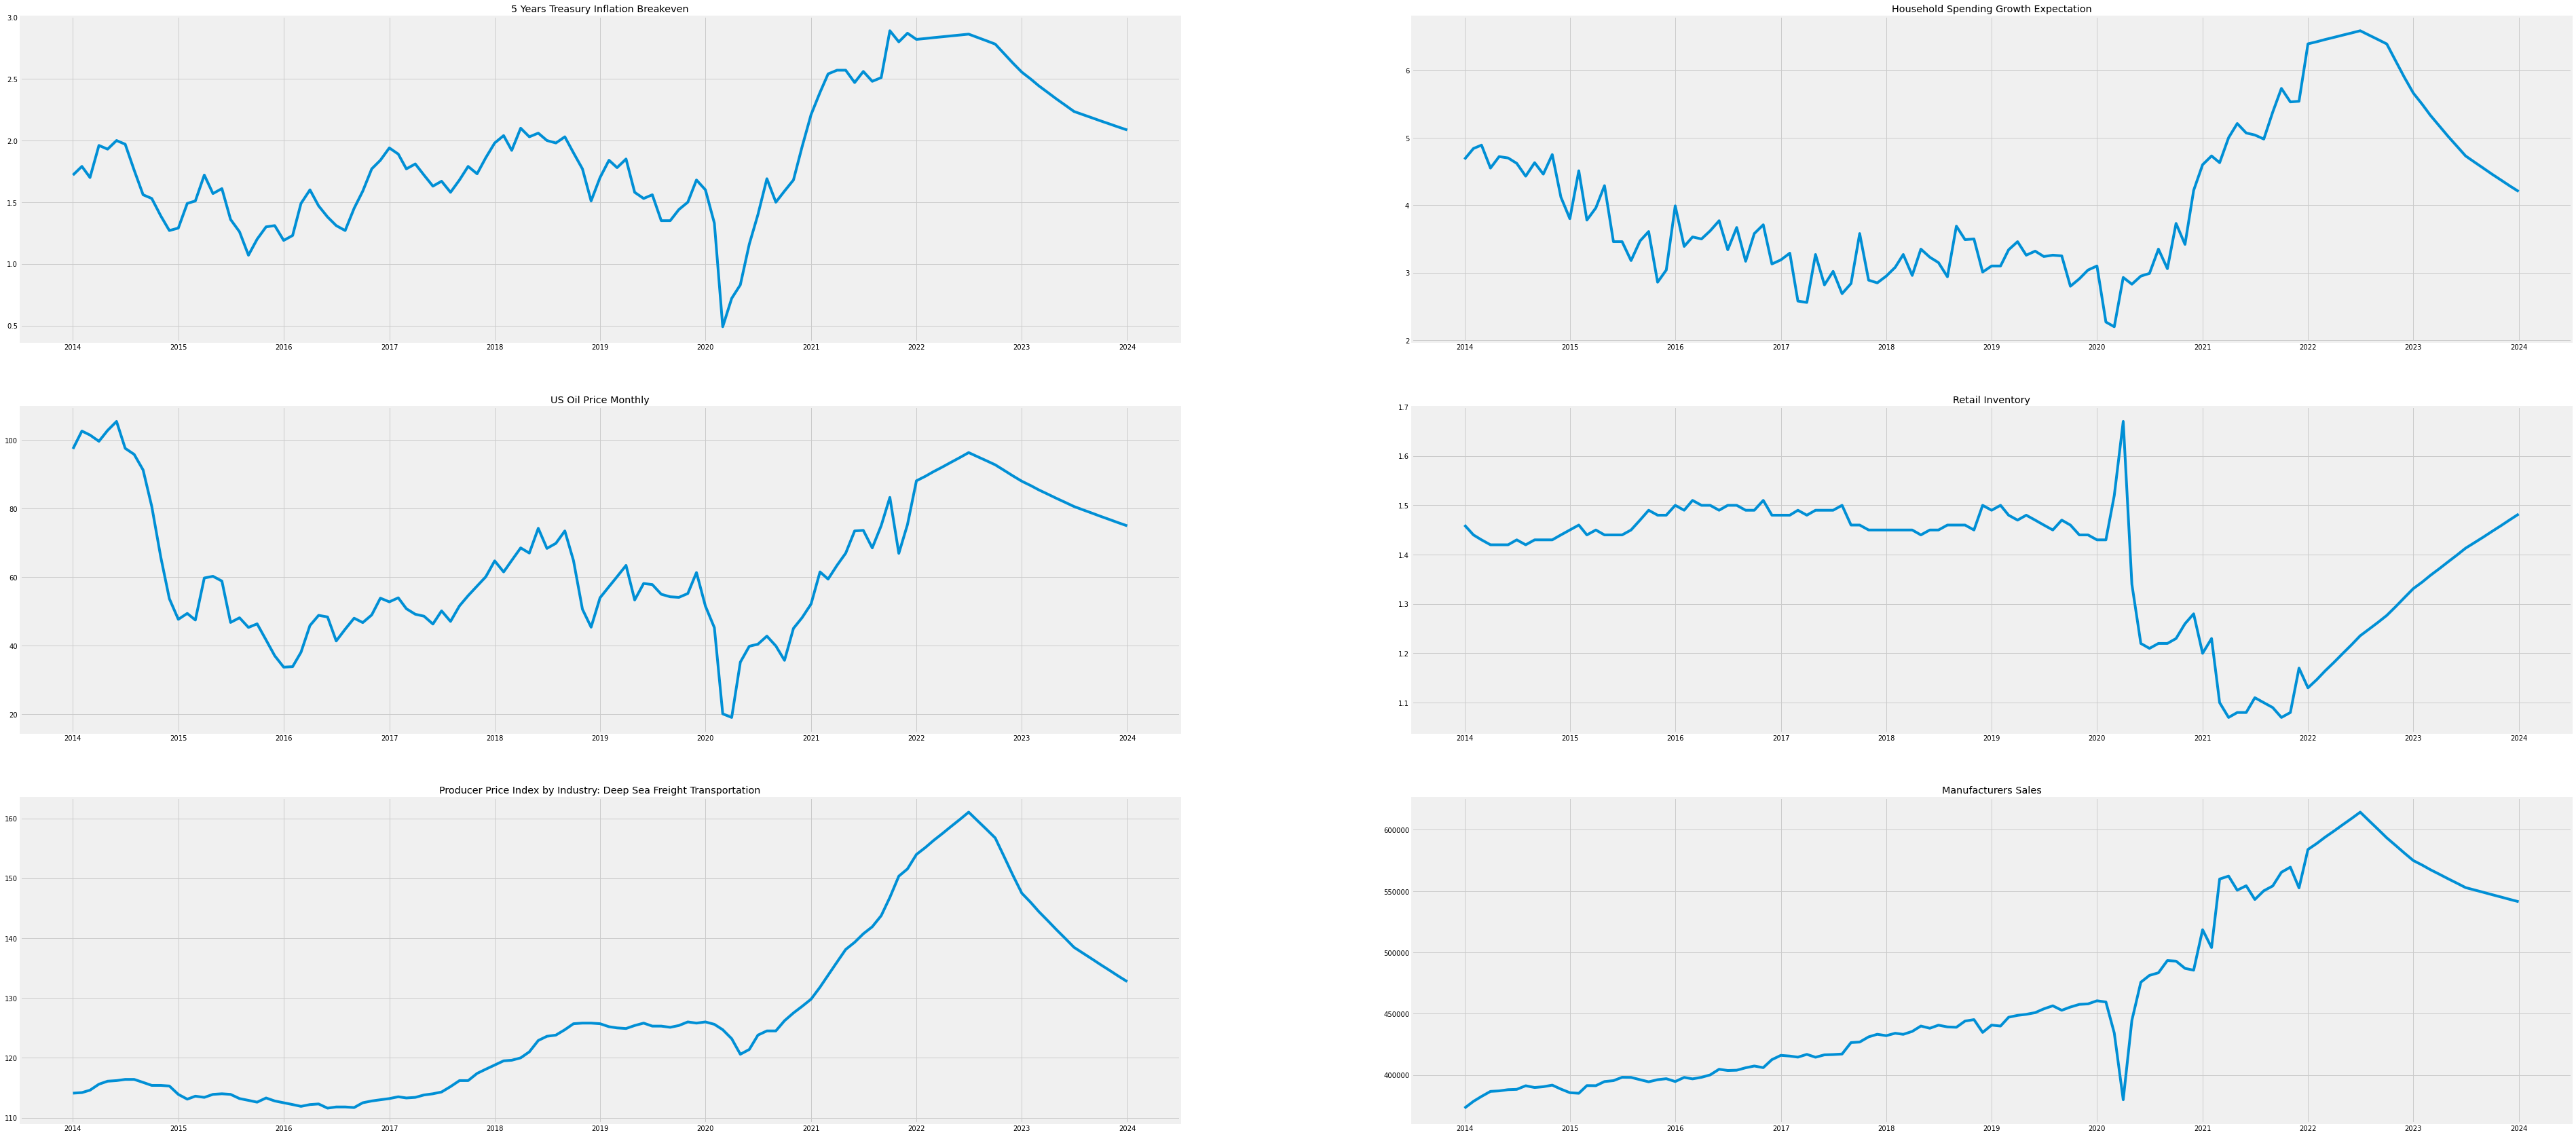

In [272]:
fig, axs =  plt.subplots(3, 2, figsize=(60,30))
axs[0,0].plot(PPIA['DATE'],PPIA.iloc[:,2])
axs[0,0].set_title('5 Years Treasury Inflation Breakeven')
axs[0,1].plot(PPIA['DATE'],PPIA.iloc[:,3])
axs[0,1].set_title('Household Spending Growth Expectation')
axs[1,0].plot(PPIA['DATE'],PPIA.iloc[:,4])
axs[1,0].set_title('US Oil Price Monthly')
axs[1,1].plot(PPIA['DATE'],PPIA.iloc[:,5])
axs[1,1].set_title('Retail Inventory')
axs[2,0].plot(PPIA['DATE'],PPIA.iloc[:,6])
axs[2,0].set_title('Producer Price Index by Industry: Deep Sea Freight Transportation')
axs[2,1].plot(PPIA['DATE'],PPIA.iloc[:,7])
axs[2,1].set_title('Manufacturers Sales')
plt.show()

### PPI B (In Percent)
1. T5YIE = 0.3, -0.775, -2.35, -1.8, -0.975
2. HH = 0.6, -0.9, -3.45, -2.65, -1.65
3. USOIL = 1.75, -1.05, -1.25, -1.05, -0.975
4. RETAILINV = 1.425, 1.05, 1.05, 0.75, 0.375
5. TRUCK = 0.875, -0.75, -1.6, -0.975, -0.6
6. MFS = 0.975, -0.95, -0.875, -0.475, -0.3

In [273]:
for i in range(97,121):
    PPIB.loc[i,:] = np.nan

In [274]:
T5YIEP = [0.3, -0.775, -2.35, -1.8, -0.975]
HHP = [0.6, -0.9, -3.45, -2.65, -1.65]
USOILP = [1.75, -1.05, -1.25, -1.05, -0.975]
RETAILINVP = [1.425, 1.05, 1.05, 0.75, 0.375]
TRUCKP = [0.875, -0.75, -1.6, -0.975, -0.6]
MFSP = [0.975, -0.95, -0.875, -0.475, -0.3]

for i in range(97,121) :
    if i < 103 :
        PPIB.iloc[i,0] = PPIB.iloc[(i-1),0] + relativedelta(months=+1)
        PPIB.iloc[i,2] = PPIB.iloc[(i-1),2] * (1+T5YIEP[0]/100)
        PPIB.iloc[i,3] = PPIB.iloc[(i-1),3] * (1+HHP[0]/100)
        PPIB.iloc[i,4] = PPIB.iloc[(i-1),4] * (1+USOILP[0]/100)
        PPIB.iloc[i,5] = PPIB.iloc[(i-1),5] * (1+RETAILINVP[0]/100)
        PPIB.iloc[i,6] = PPIB.iloc[(i-1),6] * (1+TRUCKP[0]/100)
        PPIB.iloc[i,7] = PPIB.iloc[(i-1),7] * (1+MFSP[0]/100)
    elif 102 < i < 106:
        PPIB.iloc[i,0] = PPIB.iloc[(i-1),0] + relativedelta(months=+1)
        PPIB.iloc[i,2] = PPIB.iloc[(i-1),2] * (1+T5YIEP[1]/100)
        PPIB.iloc[i,3] = PPIB.iloc[(i-1),3] * (1+HHP[1]/100)
        PPIB.iloc[i,4] = PPIB.iloc[(i-1),4] * (1+USOILP[1]/100)
        PPIB.iloc[i,5] = PPIB.iloc[(i-1),5] * (1+RETAILINVP[1]/100)
        PPIB.iloc[i,6] = PPIB.iloc[(i-1),6] * (1+TRUCKP[1]/100)
        PPIB.iloc[i,7] = PPIB.iloc[(i-1),7] * (1+MFSP[1]/100)
    elif 105 < i < 109:
        PPIB.iloc[i,0] = PPIB.iloc[(i-1),0] + relativedelta(months=+1)
        PPIB.iloc[i,2] = PPIB.iloc[(i-1),2] * (1+T5YIEP[2]/100)
        PPIB.iloc[i,3] = PPIB.iloc[(i-1),3] * (1+HHP[2]/100)
        PPIB.iloc[i,4] = PPIB.iloc[(i-1),4] * (1+USOILP[2]/100)
        PPIB.iloc[i,5] = PPIB.iloc[(i-1),5] * (1+RETAILINVP[2]/100)
        PPIB.iloc[i,6] = PPIB.iloc[(i-1),6] * (1+TRUCKP[2]/100)
        PPIB.iloc[i,7] = PPIB.iloc[(i-1),7] * (1+MFSP[2]/100)
    elif 108 < i < 115:
        PPIB.iloc[i,0] = PPIB.iloc[(i-1),0] + relativedelta(months=+1)
        PPIB.iloc[i,2] = PPIB.iloc[(i-1),2] * (1+T5YIEP[3]/100)
        PPIB.iloc[i,3] = PPIB.iloc[(i-1),3] * (1+HHP[3]/100)
        PPIB.iloc[i,4] = PPIB.iloc[(i-1),4] * (1+USOILP[3]/100)
        PPIB.iloc[i,5] = PPIB.iloc[(i-1),5] * (1+RETAILINVP[3]/100)
        PPIB.iloc[i,6] = PPIB.iloc[(i-1),6] * (1+TRUCKP[3]/100)
        PPIB.iloc[i,7] = PPIB.iloc[(i-1),7] * (1+MFSP[3]/100)
    elif 114 < i < 121:
        PPIB.iloc[i,0] = PPIB.iloc[(i-1),0] + relativedelta(months=+1)
        PPIB.iloc[i,2] = PPIB.iloc[(i-1),2] * (1+T5YIEP[4]/100)
        PPIB.iloc[i,3] = PPIB.iloc[(i-1),3] * (1+HHP[4]/100)
        PPIB.iloc[i,4] = PPIB.iloc[(i-1),4] * (1+USOILP[4]/100)
        PPIB.iloc[i,5] = PPIB.iloc[(i-1),5] * (1+RETAILINVP[4]/100)
        PPIB.iloc[i,6] = PPIB.iloc[(i-1),6] * (1+TRUCKP[4]/100)
        PPIB.iloc[i,7] = PPIB.iloc[(i-1),7] * (1+MFSP[4]/100)

In [275]:
PPIB.tail(20)

DATE  PCU483111483111     T5YIE        HH      USOIL  RETAILINV  \
101 2022-06-01              NaN  2.862555  6.584014  96.112766   1.212840   
102 2022-07-01              NaN  2.871142  6.623518  97.794739   1.230123   
103 2022-08-01              NaN  2.848891  6.563907  96.767895   1.243039   
104 2022-09-01              NaN  2.826812  6.504832  95.751832   1.256091   
105 2022-10-01              NaN  2.804904  6.446288  94.746437   1.269280   
106 2022-11-01              NaN  2.738989  6.223891  93.562107   1.282608   
107 2022-12-01              NaN  2.674623  6.009167  92.392581   1.296075   
108 2023-01-01              NaN  2.611769  5.801851  91.237673   1.309684   
109 2023-02-01              NaN  2.564757  5.648102  90.279678   1.319506   
110 2023-03-01              NaN  2.518592  5.498427  89.331741   1.329403   
111 2023-04-01              NaN  2.473257  5.352719  88.393758   1.339373   
112 2023-05-01              NaN  2.428738  5.210872  87.465623   1.349419   
113 2023-06-01              NaN  2.385021  5.072783  86.547234   1.359539   
114 2023-07-01              NaN  2.342091  4.938355  85.638488   1.369736   
115 2023-08-01              NaN  2.319255  4.856872  84.803513   1.374872   
116 2023-09-01              NaN  2.296643  4.776733  83.976679   1.380028   
117 2023-10-01              NaN  2.274250  4.697917  83.157906   1.385203   
118 2023-11-01              NaN  2.252076  4.620402  82.347117   1.390398   
119 2023-12-01              NaN  2.230119  4.544165  81.544232   1.395612   
120 2024-01-01              NaN  2.208375  4.469186  80.749176   1.400845   

          TRUCK            MFS  
101  160.824062  613010.659809  
102  162.231273  618987.513742  
103  161.014538  613107.132362  
104  159.806929  607282.614604  
105  158.608377  601513.429765  
106  156.070643  596250.187255  
107  153.573513  591032.998117  
108  151.116337  585861.459383  
109  149.642952  583078.617451  
110  148.183934  580308.994018  
111  146.739140  577552.526296  
112  145.308434  574809.151797  
113  143.891676  572078.808326  
114  142.488733  569361.433986  
115  141.633800  567653.349684  
116  140.783997  565950.389635  
117  139.939293  564252.538466  
118  139.099658  562559.780851  
119  138.265060  560872.101508  
120  137.435469  559189.485204

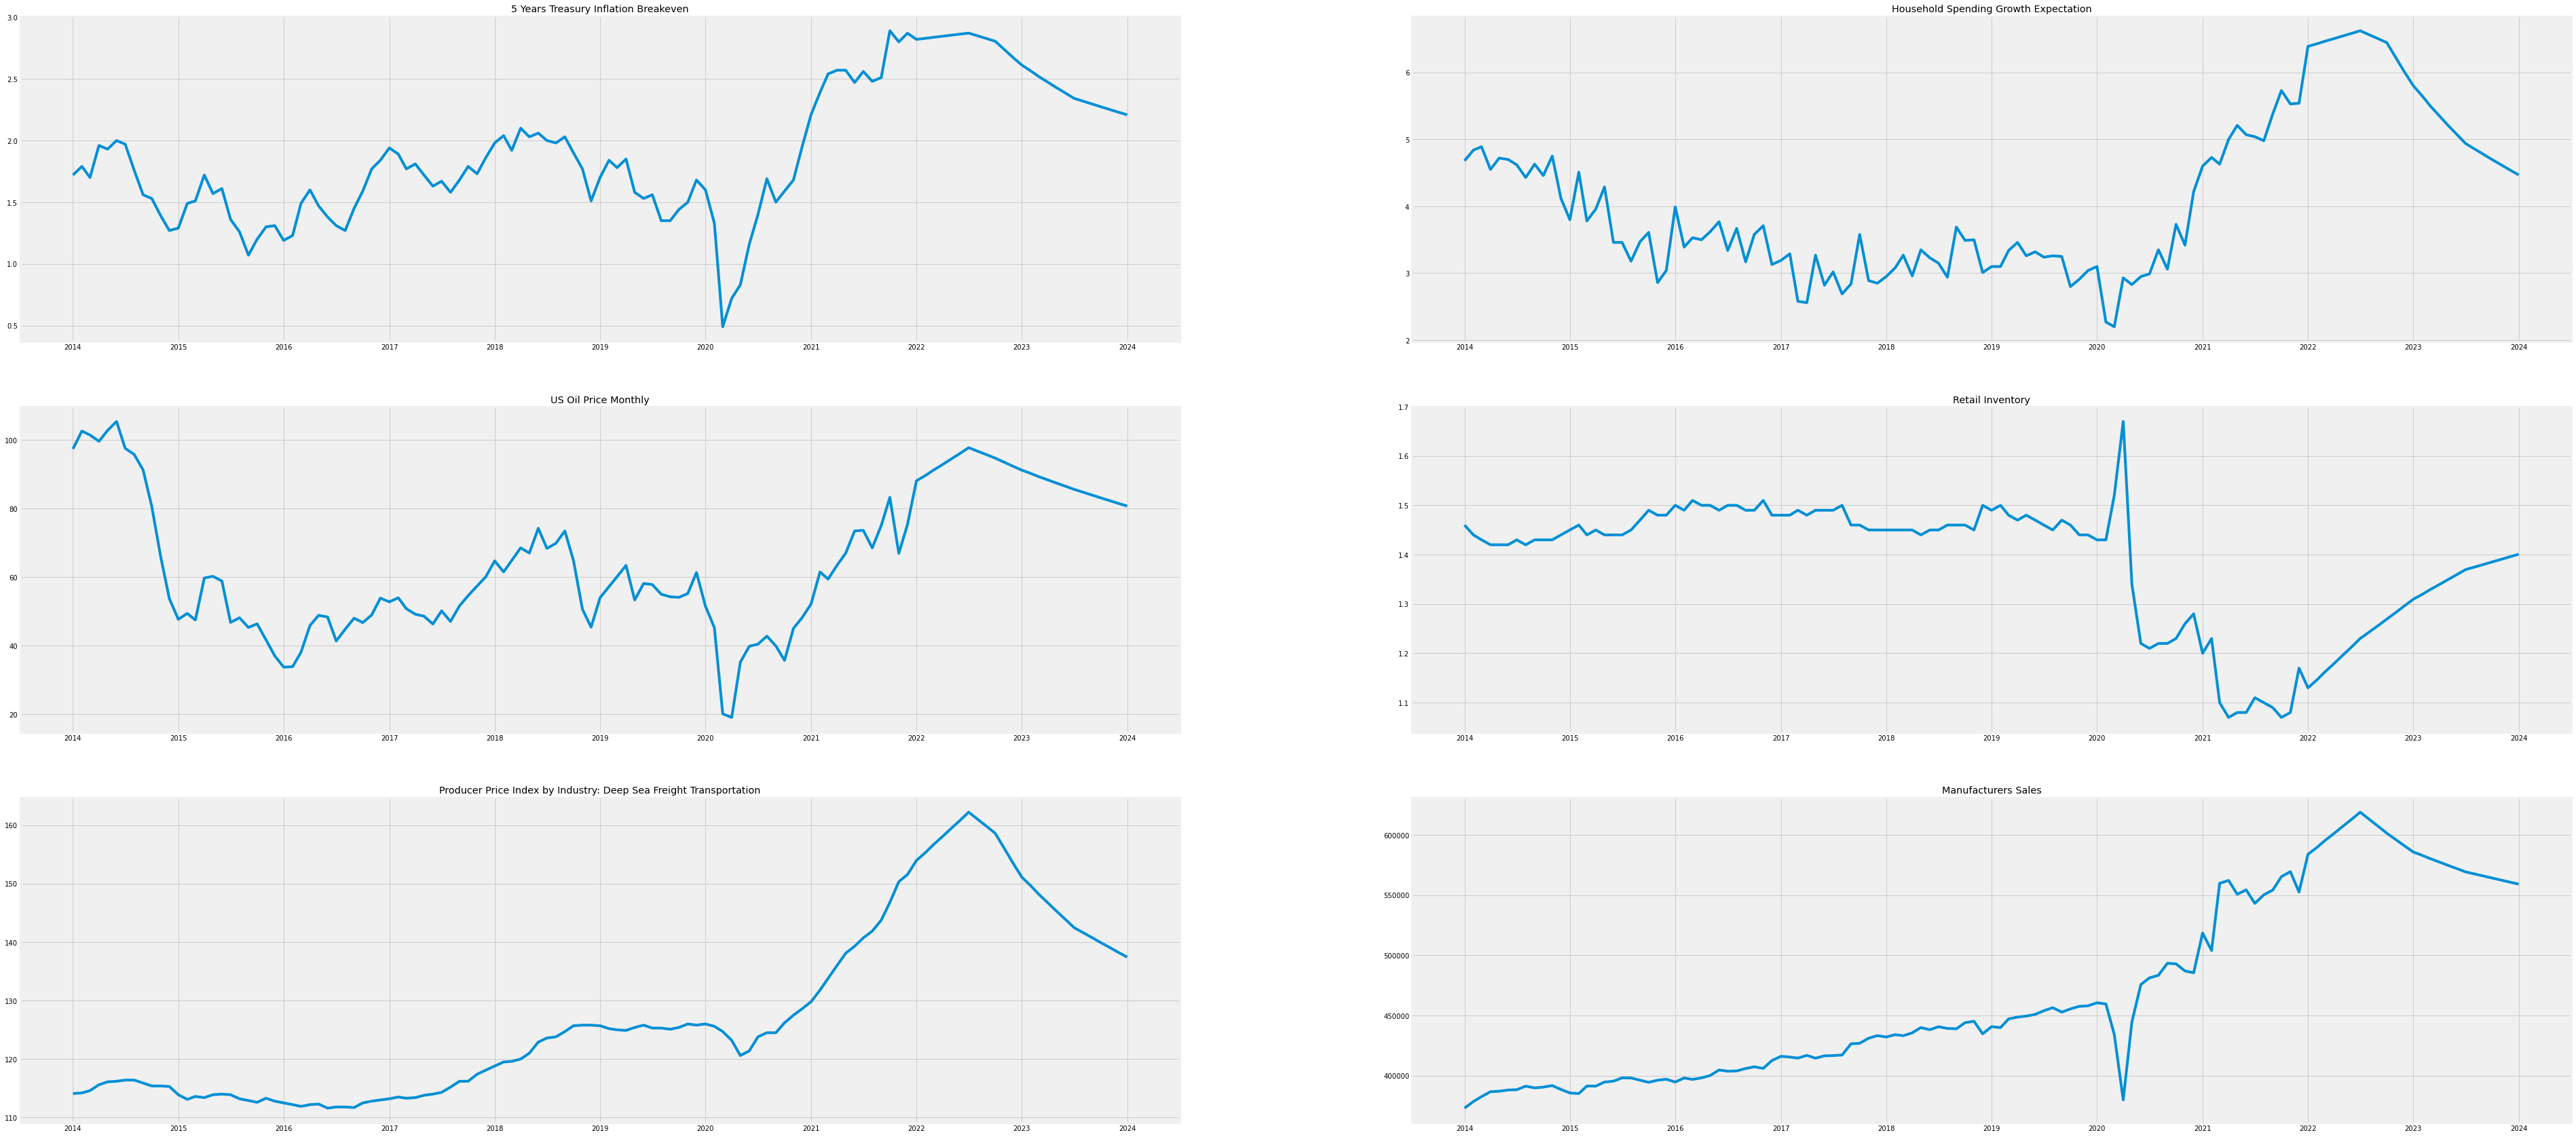

In [276]:
fig, axs =  plt.subplots(3, 2, figsize=(60,30))
axs[0,0].plot(PPIB['DATE'],PPIB.iloc[:,2])
axs[0,0].set_title('5 Years Treasury Inflation Breakeven')
axs[0,1].plot(PPIB['DATE'],PPIB.iloc[:,3])
axs[0,1].set_title('Household Spending Growth Expectation')
axs[1,0].plot(PPIB['DATE'],PPIB.iloc[:,4])
axs[1,0].set_title('US Oil Price Monthly')
axs[1,1].plot(PPIB['DATE'],PPIB.iloc[:,5])
axs[1,1].set_title('Retail Inventory')
axs[2,0].plot(PPIB['DATE'],PPIB.iloc[:,6])
axs[2,0].set_title('Producer Price Index by Industry: Deep Sea Freight Transportation')
axs[2,1].plot(PPIB['DATE'],PPIB.iloc[:,7])
axs[2,1].set_title('Manufacturers Sales')
plt.show()

### PPI C (In Percent)
1. T5YIE = 0.35, -0.65, -2.1, -1.675, -0.755
2. HH = 0.7, -0.85, -3.35, -2.475, -1.5
3. USOIL = 1.95, -0.975, -1.175, -0.955, -0.85
4. RETAILINV = 1.385, 1, 1, 0.7, 0.35
5. TRUCK = 0.925, -0.7, -1.5, -0.925, -0.5
6. MFS = 1.05, -0.915, -0.825, -0.425, -0.285

In [277]:
for i in range(97,121):
    PPIC.loc[i,:] = np.nan

In [278]:
T5YIEP = [0.35, -0.65, -2.1, -1.675, -0.755]
HHP = [0.7, -0.85, -3.35, -2.475, -1.5]
USOILP = [1.95, -0.975, -1.175, -0.955, -0.85]
RETAILINVP = [1.385, 1, 1, 0.7, 0.35]
TRUCKP = [0.925, -0.7, -1.5, -0.925, -0.5]
MFSP = [1.05, -0.915, -0.825, -0.425, -0.285]

for i in range(97,121) :
    if i < 103 :
        PPIC.iloc[i,0] = PPIC.iloc[(i-1),0] + relativedelta(months=+1)
        PPIC.iloc[i,2] = PPIC.iloc[(i-1),2] * (1+T5YIEP[0]/100)
        PPIC.iloc[i,3] = PPIC.iloc[(i-1),3] * (1+HHP[0]/100)
        PPIC.iloc[i,4] = PPIC.iloc[(i-1),4] * (1+USOILP[0]/100)
        PPIC.iloc[i,5] = PPIC.iloc[(i-1),5] * (1+RETAILINVP[0]/100)
        PPIC.iloc[i,6] = PPIC.iloc[(i-1),6] * (1+TRUCKP[0]/100)
        PPIC.iloc[i,7] = PPIC.iloc[(i-1),7] * (1+MFSP[0]/100)
    elif 102 < i < 106:
        PPIC.iloc[i,0] = PPIC.iloc[(i-1),0] + relativedelta(months=+1)
        PPIC.iloc[i,2] = PPIC.iloc[(i-1),2] * (1+T5YIEP[1]/100)
        PPIC.iloc[i,3] = PPIC.iloc[(i-1),3] * (1+HHP[1]/100)
        PPIC.iloc[i,4] = PPIC.iloc[(i-1),4] * (1+USOILP[1]/100)
        PPIC.iloc[i,5] = PPIC.iloc[(i-1),5] * (1+RETAILINVP[1]/100)
        PPIC.iloc[i,6] = PPIC.iloc[(i-1),6] * (1+TRUCKP[1]/100)
        PPIC.iloc[i,7] = PPIC.iloc[(i-1),7] * (1+MFSP[1]/100)
    elif 105 < i < 109:
        PPIC.iloc[i,0] = PPIC.iloc[(i-1),0] + relativedelta(months=+1)
        PPIC.iloc[i,2] = PPIC.iloc[(i-1),2] * (1+T5YIEP[2]/100)
        PPIC.iloc[i,3] = PPIC.iloc[(i-1),3] * (1+HHP[2]/100)
        PPIC.iloc[i,4] = PPIC.iloc[(i-1),4] * (1+USOILP[2]/100)
        PPIC.iloc[i,5] = PPIC.iloc[(i-1),5] * (1+RETAILINVP[2]/100)
        PPIC.iloc[i,6] = PPIC.iloc[(i-1),6] * (1+TRUCKP[2]/100)
        PPIC.iloc[i,7] = PPIC.iloc[(i-1),7] * (1+MFSP[2]/100)
    elif 108 < i < 115:
        PPIC.iloc[i,0] = PPIC.iloc[(i-1),0] + relativedelta(months=+1)
        PPIC.iloc[i,2] = PPIC.iloc[(i-1),2] * (1+T5YIEP[3]/100)
        PPIC.iloc[i,3] = PPIC.iloc[(i-1),3] * (1+HHP[3]/100)
        PPIC.iloc[i,4] = PPIC.iloc[(i-1),4] * (1+USOILP[3]/100)
        PPIC.iloc[i,5] = PPIC.iloc[(i-1),5] * (1+RETAILINVP[3]/100)
        PPIC.iloc[i,6] = PPIC.iloc[(i-1),6] * (1+TRUCKP[3]/100)
        PPIC.iloc[i,7] = PPIC.iloc[(i-1),7] * (1+MFSP[3]/100)
    elif 114 < i < 121:
        PPIC.iloc[i,0] = PPIC.iloc[(i-1),0] + relativedelta(months=+1)
        PPIC.iloc[i,2] = PPIC.iloc[(i-1),2] * (1+T5YIEP[4]/100)
        PPIC.iloc[i,3] = PPIC.iloc[(i-1),3] * (1+HHP[4]/100)
        PPIC.iloc[i,4] = PPIC.iloc[(i-1),4] * (1+USOILP[4]/100)
        PPIC.iloc[i,5] = PPIC.iloc[(i-1),5] * (1+RETAILINVP[4]/100)
        PPIC.iloc[i,6] = PPIC.iloc[(i-1),6] * (1+TRUCKP[4]/100)
        PPIC.iloc[i,7] = PPIC.iloc[(i-1),7] * (1+MFSP[4]/100)

In [279]:
PPIC.tail(20)

DATE  PCU483111483111     T5YIE        HH      USOIL  RETAILINV  \
101 2022-06-01              NaN  2.869697  6.616803  97.061084   1.210450   
102 2022-07-01              NaN  2.879741  6.663121  98.953775   1.227215   
103 2022-08-01              NaN  2.861022  6.606484  97.988976   1.239487   
104 2022-09-01              NaN  2.842426  6.550329  97.033583   1.251882   
105 2022-10-01              NaN  2.823950  6.494651  96.087506   1.264401   
106 2022-11-01              NaN  2.764647  6.277080  94.958478   1.277045   
107 2022-12-01              NaN  2.706589  6.066798  93.842715   1.289815   
108 2023-01-01              NaN  2.649751  5.863561  92.740064   1.302714   
109 2023-02-01              NaN  2.605368  5.718437  91.854396   1.311833   
110 2023-03-01              NaN  2.561728  5.576906  90.977186   1.321015   
111 2023-04-01              NaN  2.518819  5.438878  90.108354   1.330262   
112 2023-05-01              NaN  2.476629  5.304265  89.247820   1.339574   
113 2023-06-01              NaN  2.435145  5.172985  88.395503   1.348951   
114 2023-07-01              NaN  2.394356  5.044953  87.551326   1.358394   
115 2023-08-01              NaN  2.376279  4.969279  86.807140   1.363148   
116 2023-09-01              NaN  2.358338  4.894740  86.069279   1.367919   
117 2023-10-01              NaN  2.340533  4.821319  85.337690   1.372707   
118 2023-11-01              NaN  2.322862  4.748999  84.612320   1.377512   
119 2023-12-01              NaN  2.305324  4.677764  83.893115   1.382333   
120 2024-01-01              NaN  2.287919  4.607598  83.180023   1.387171   

          TRUCK            MFS  
101  161.223030  615290.637429  
102  162.714343  621751.189122  
103  161.575343  616062.165741  
104  160.444315  610425.196925  
105  159.321205  604839.806373  
106  156.931387  599849.877970  
107  154.577416  594901.116477  
108  152.258755  589993.182266  
109  150.850362  587485.711241  
110  149.454996  584988.896969  
111  148.072537  582502.694157  
112  146.702866  580027.057706  
113  145.345865  577561.942711  
114  144.001415  575107.304455  
115  143.281408  573468.248637  
116  142.565001  571833.864128  
117  141.852176  570204.137616  
118  141.142915  568579.055823  
119  140.437201  566958.605514  
120  139.735015  565342.773489

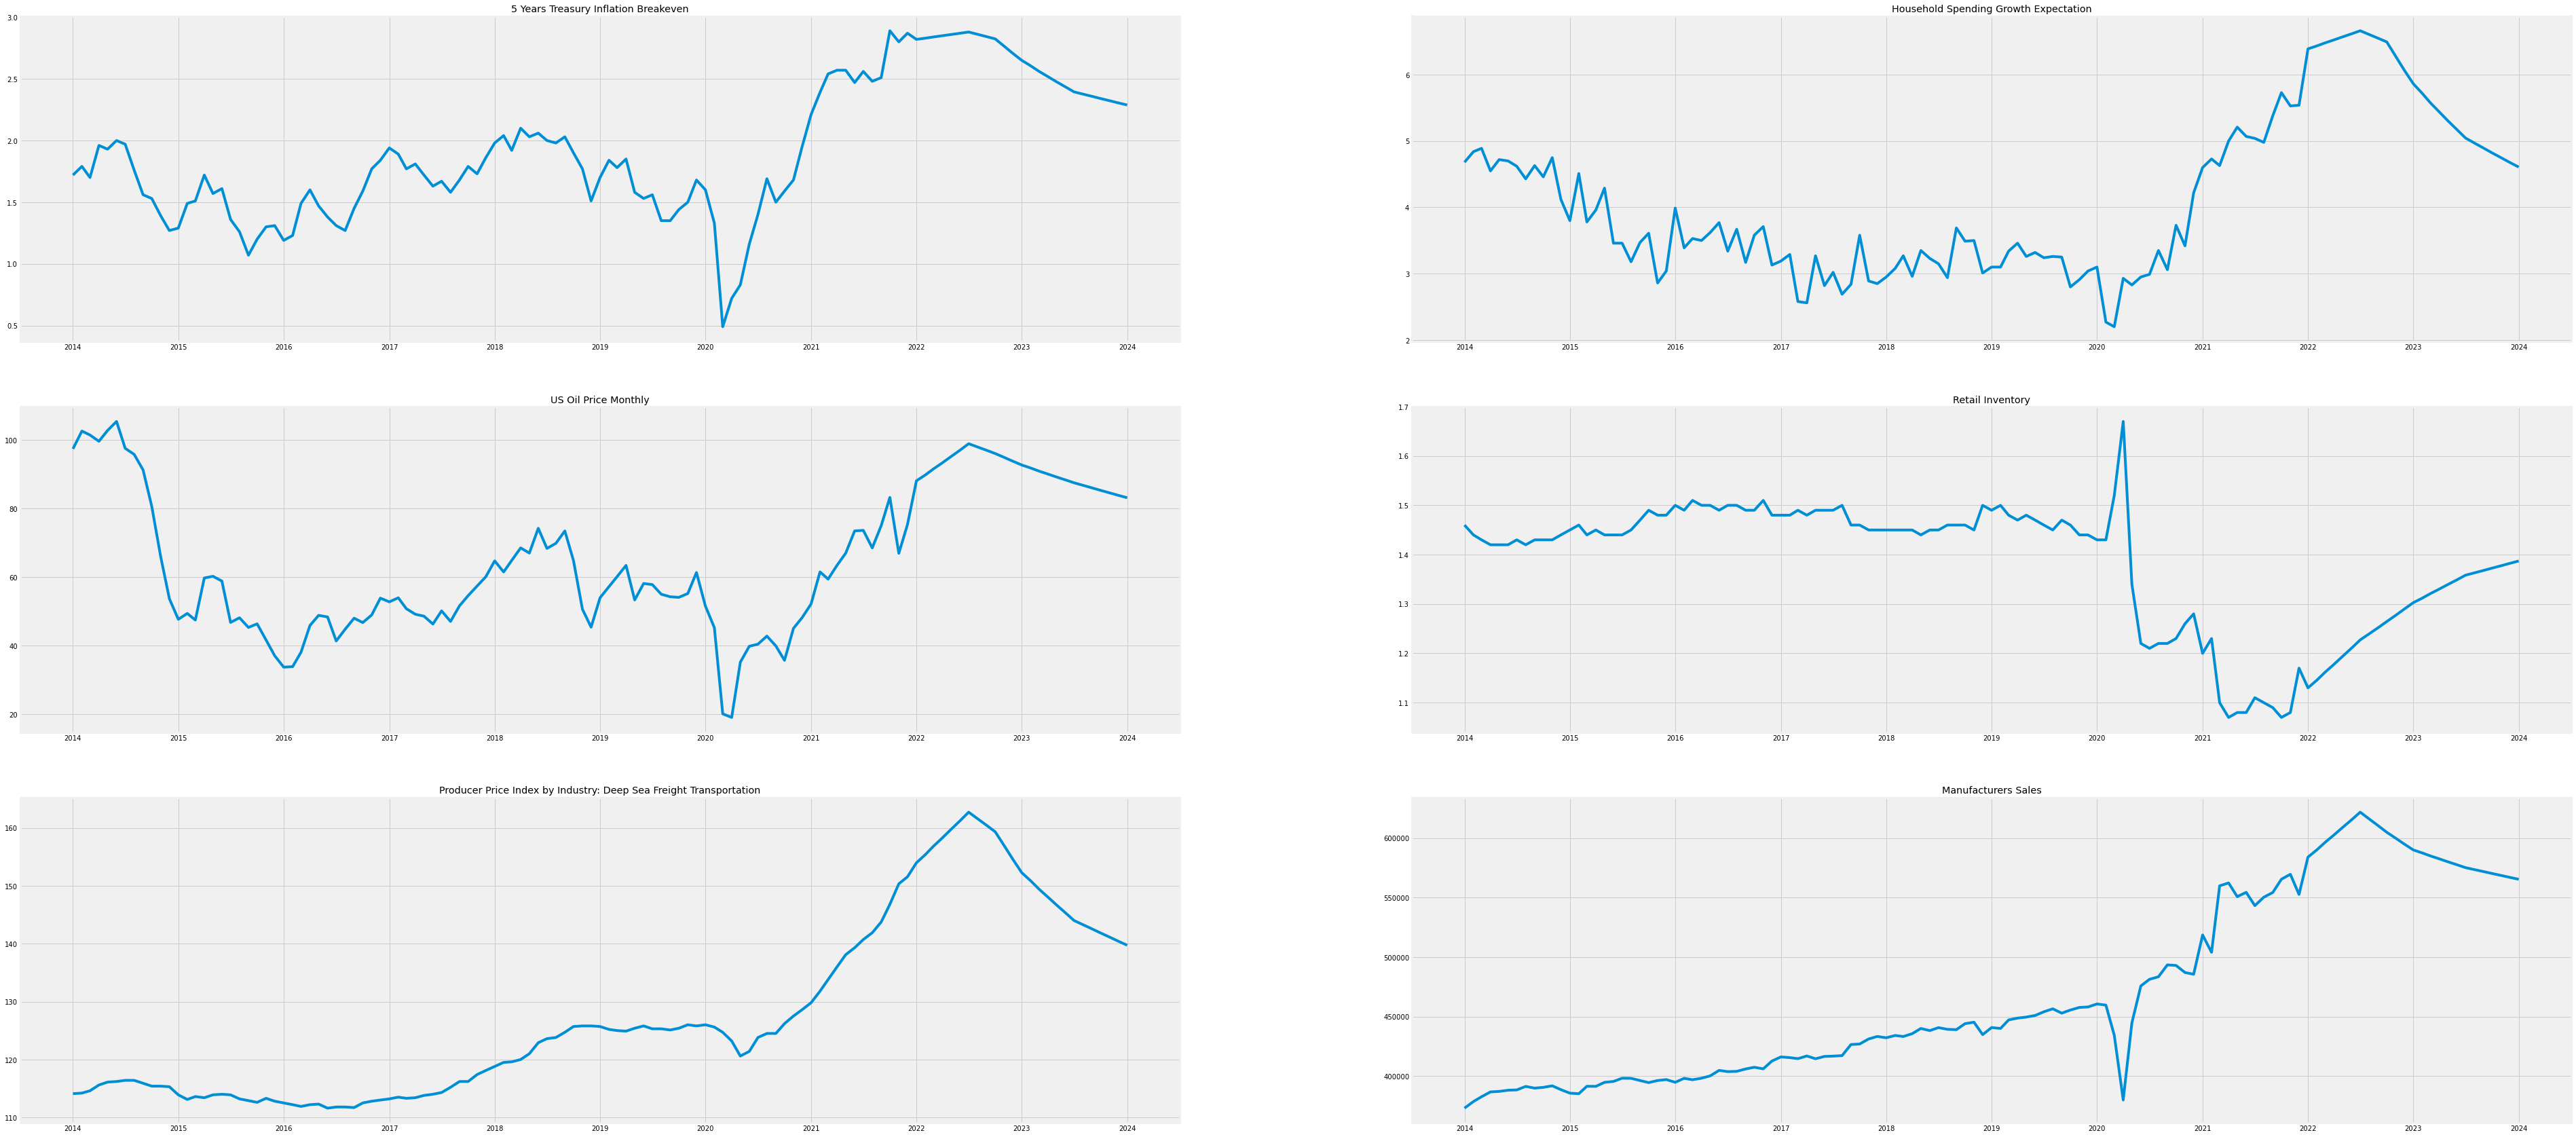

In [280]:
fig, axs =  plt.subplots(3, 2, figsize=(60,30))
axs[0,0].plot(PPIC['DATE'],PPIC.iloc[:,2])
axs[0,0].set_title('5 Years Treasury Inflation Breakeven')
axs[0,1].plot(PPIC['DATE'],PPIC.iloc[:,3])
axs[0,1].set_title('Household Spending Growth Expectation')
axs[1,0].plot(PPIC['DATE'],PPIC.iloc[:,4])
axs[1,0].set_title('US Oil Price Monthly')
axs[1,1].plot(PPIC['DATE'],PPIC.iloc[:,5])
axs[1,1].set_title('Retail Inventory')
axs[2,0].plot(PPIC['DATE'],PPIC.iloc[:,6])
axs[2,0].set_title('Producer Price Index by Industry: Deep Sea Freight Transportation')
axs[2,1].plot(PPIC['DATE'],PPIC.iloc[:,7])
axs[2,1].set_title('Manufacturers Sales')
plt.show()

### PPI D (In Percent)
1. T5YIE = 0.4, -0.505, -1.985, -1.495, -0.515
2. HH = 0.8, -0.8, -3.115, -2.295, -1.3
3. USOIL = 2.1, -1.05, -1.075, -0.8, -0.715
4. RETAILINV = 1.385, 1, 1, 0.7, 0.35
5. TRUCK = 1.05, -0.675, -1.375, -0.925, -0.5
6. MFS = 1.175, -0.895, -0.795, -0.385, -0.255

In [281]:
for i in range(97,121):
    PPID.loc[i,:] = np.nan

In [282]:
T5YIEP = [0.4, -0.505, -1.985, -1.495, -0.515]
HHP = [0.8, -0.8, -3.115, -2.295, -1.3]
USOILP = [2.1, -1.05, -1.075, -0.8, -0.715]
RETAILINVP = [1.345, 0.95, 0.95, 0.65, 0.3]
TRUCKP = [1.05, -0.675, -1.375, -0.9, -0.4]
MFSP = [1.175, -0.895, -0.795, -0.385, -0.255]

for i in range(97,121) :
    if i < 103 :
        PPID.iloc[i,0] = PPID.iloc[(i-1),0] + relativedelta(months=+1)
        PPID.iloc[i,2] = PPID.iloc[(i-1),2] * (1+T5YIEP[0]/100)
        PPID.iloc[i,3] = PPID.iloc[(i-1),3] * (1+HHP[0]/100)
        PPID.iloc[i,4] = PPID.iloc[(i-1),4] * (1+USOILP[0]/100)
        PPID.iloc[i,5] = PPID.iloc[(i-1),5] * (1+RETAILINVP[0]/100)
        PPID.iloc[i,6] = PPID.iloc[(i-1),6] * (1+TRUCKP[0]/100)
        PPID.iloc[i,7] = PPID.iloc[(i-1),7] * (1+MFSP[0]/100)
    elif 102 < i < 106:
        PPID.iloc[i,0] = PPID.iloc[(i-1),0] + relativedelta(months=+1)
        PPID.iloc[i,2] = PPID.iloc[(i-1),2] * (1+T5YIEP[1]/100)
        PPID.iloc[i,3] = PPID.iloc[(i-1),3] * (1+HHP[1]/100)
        PPID.iloc[i,4] = PPID.iloc[(i-1),4] * (1+USOILP[1]/100)
        PPID.iloc[i,5] = PPID.iloc[(i-1),5] * (1+RETAILINVP[1]/100)
        PPID.iloc[i,6] = PPID.iloc[(i-1),6] * (1+TRUCKP[1]/100)
        PPID.iloc[i,7] = PPID.iloc[(i-1),7] * (1+MFSP[1]/100)
    elif 105 < i < 109:
        PPID.iloc[i,0] = PPID.iloc[(i-1),0] + relativedelta(months=+1)
        PPID.iloc[i,2] = PPID.iloc[(i-1),2] * (1+T5YIEP[2]/100)
        PPID.iloc[i,3] = PPID.iloc[(i-1),3] * (1+HHP[2]/100)
        PPID.iloc[i,4] = PPID.iloc[(i-1),4] * (1+USOILP[2]/100)
        PPID.iloc[i,5] = PPID.iloc[(i-1),5] * (1+RETAILINVP[2]/100)
        PPID.iloc[i,6] = PPID.iloc[(i-1),6] * (1+TRUCKP[2]/100)
        PPID.iloc[i,7] = PPID.iloc[(i-1),7] * (1+MFSP[2]/100)
    elif 108 < i < 115:
        PPID.iloc[i,0] = PPID.iloc[(i-1),0] + relativedelta(months=+1)
        PPID.iloc[i,2] = PPID.iloc[(i-1),2] * (1+T5YIEP[3]/100)
        PPID.iloc[i,3] = PPID.iloc[(i-1),3] * (1+HHP[3]/100)
        PPID.iloc[i,4] = PPID.iloc[(i-1),4] * (1+USOILP[3]/100)
        PPID.iloc[i,5] = PPID.iloc[(i-1),5] * (1+RETAILINVP[3]/100)
        PPID.iloc[i,6] = PPID.iloc[(i-1),6] * (1+TRUCKP[3]/100)
        PPID.iloc[i,7] = PPID.iloc[(i-1),7] * (1+MFSP[3]/100)
    elif 114 < i < 121:
        PPID.iloc[i,0] = PPID.iloc[(i-1),0] + relativedelta(months=+1)
        PPID.iloc[i,2] = PPID.iloc[(i-1),2] * (1+T5YIEP[4]/100)
        PPID.iloc[i,3] = PPID.iloc[(i-1),3] * (1+HHP[4]/100)
        PPID.iloc[i,4] = PPID.iloc[(i-1),4] * (1+USOILP[4]/100)
        PPID.iloc[i,5] = PPID.iloc[(i-1),5] * (1+RETAILINVP[4]/100)
        PPID.iloc[i,6] = PPID.iloc[(i-1),6] * (1+TRUCKP[4]/100)
        PPID.iloc[i,7] = PPID.iloc[(i-1),7] * (1+MFSP[4]/100)

In [283]:
PPID.tail(20)

DATE  PCU483111483111     T5YIE        HH      USOIL  RETAILINV  \
101 2022-06-01              NaN  2.876853  6.649722  97.777223   1.208064   
102 2022-07-01              NaN  2.888360  6.702920  99.830544   1.224313   
103 2022-08-01              NaN  2.873774  6.649297  98.782324   1.235944   
104 2022-09-01              NaN  2.859262  6.596102  97.745109   1.247685   
105 2022-10-01              NaN  2.844822  6.543334  96.718785   1.259538   
106 2022-11-01              NaN  2.788353  6.339509  95.679059   1.271504   
107 2022-12-01              NaN  2.733004  6.142033  94.650509   1.283583   
108 2023-01-01              NaN  2.678754  5.950709  93.633016   1.295777   
109 2023-02-01              NaN  2.638706  5.814140  92.883952   1.304200   
110 2023-03-01              NaN  2.599258  5.680706  92.140880   1.312677   
111 2023-04-01              NaN  2.560399  5.550333  91.403753   1.321209   
112 2023-05-01              NaN  2.522121  5.422953  90.672523   1.329797   
113 2023-06-01              NaN  2.484415  5.298496  89.947143   1.338441   
114 2023-07-01              NaN  2.447273  5.176896  89.227566   1.347141   
115 2023-08-01              NaN  2.434670  5.109596  88.589588   1.351182   
116 2023-09-01              NaN  2.422131  5.043172  87.956173   1.355236   
117 2023-10-01              NaN  2.409657  4.977610  87.327286   1.359302   
118 2023-11-01              NaN  2.397247  4.912901  86.702896   1.363379   
119 2023-12-01              NaN  2.384902  4.849034  86.082970   1.367470   
120 2024-01-01              NaN  2.372619  4.785996  85.467477   1.371572   

          TRUCK            MFS  
101  162.223915  619105.671846  
102  163.927266  626380.163491  
103  162.820757  620774.061027  
104  161.721717  615218.133181  
105  160.630095  609711.930889  
106  158.421432  604864.721039  
107  156.243137  600056.046506  
108  154.094794  595285.600937  
109  152.707941  592993.751373  
110  151.333569  590710.725430  
111  149.971567  588436.489137  
112  148.621823  586171.008654  
113  147.284227  583914.250271  
114  145.958669  581666.180407  
115  145.374834  580182.931647  
116  144.793335  578703.465172  
117  144.214161  577227.771335  
118  143.637305  575755.840519  
119  143.062755  574287.663125  
120  142.490504  572823.229584

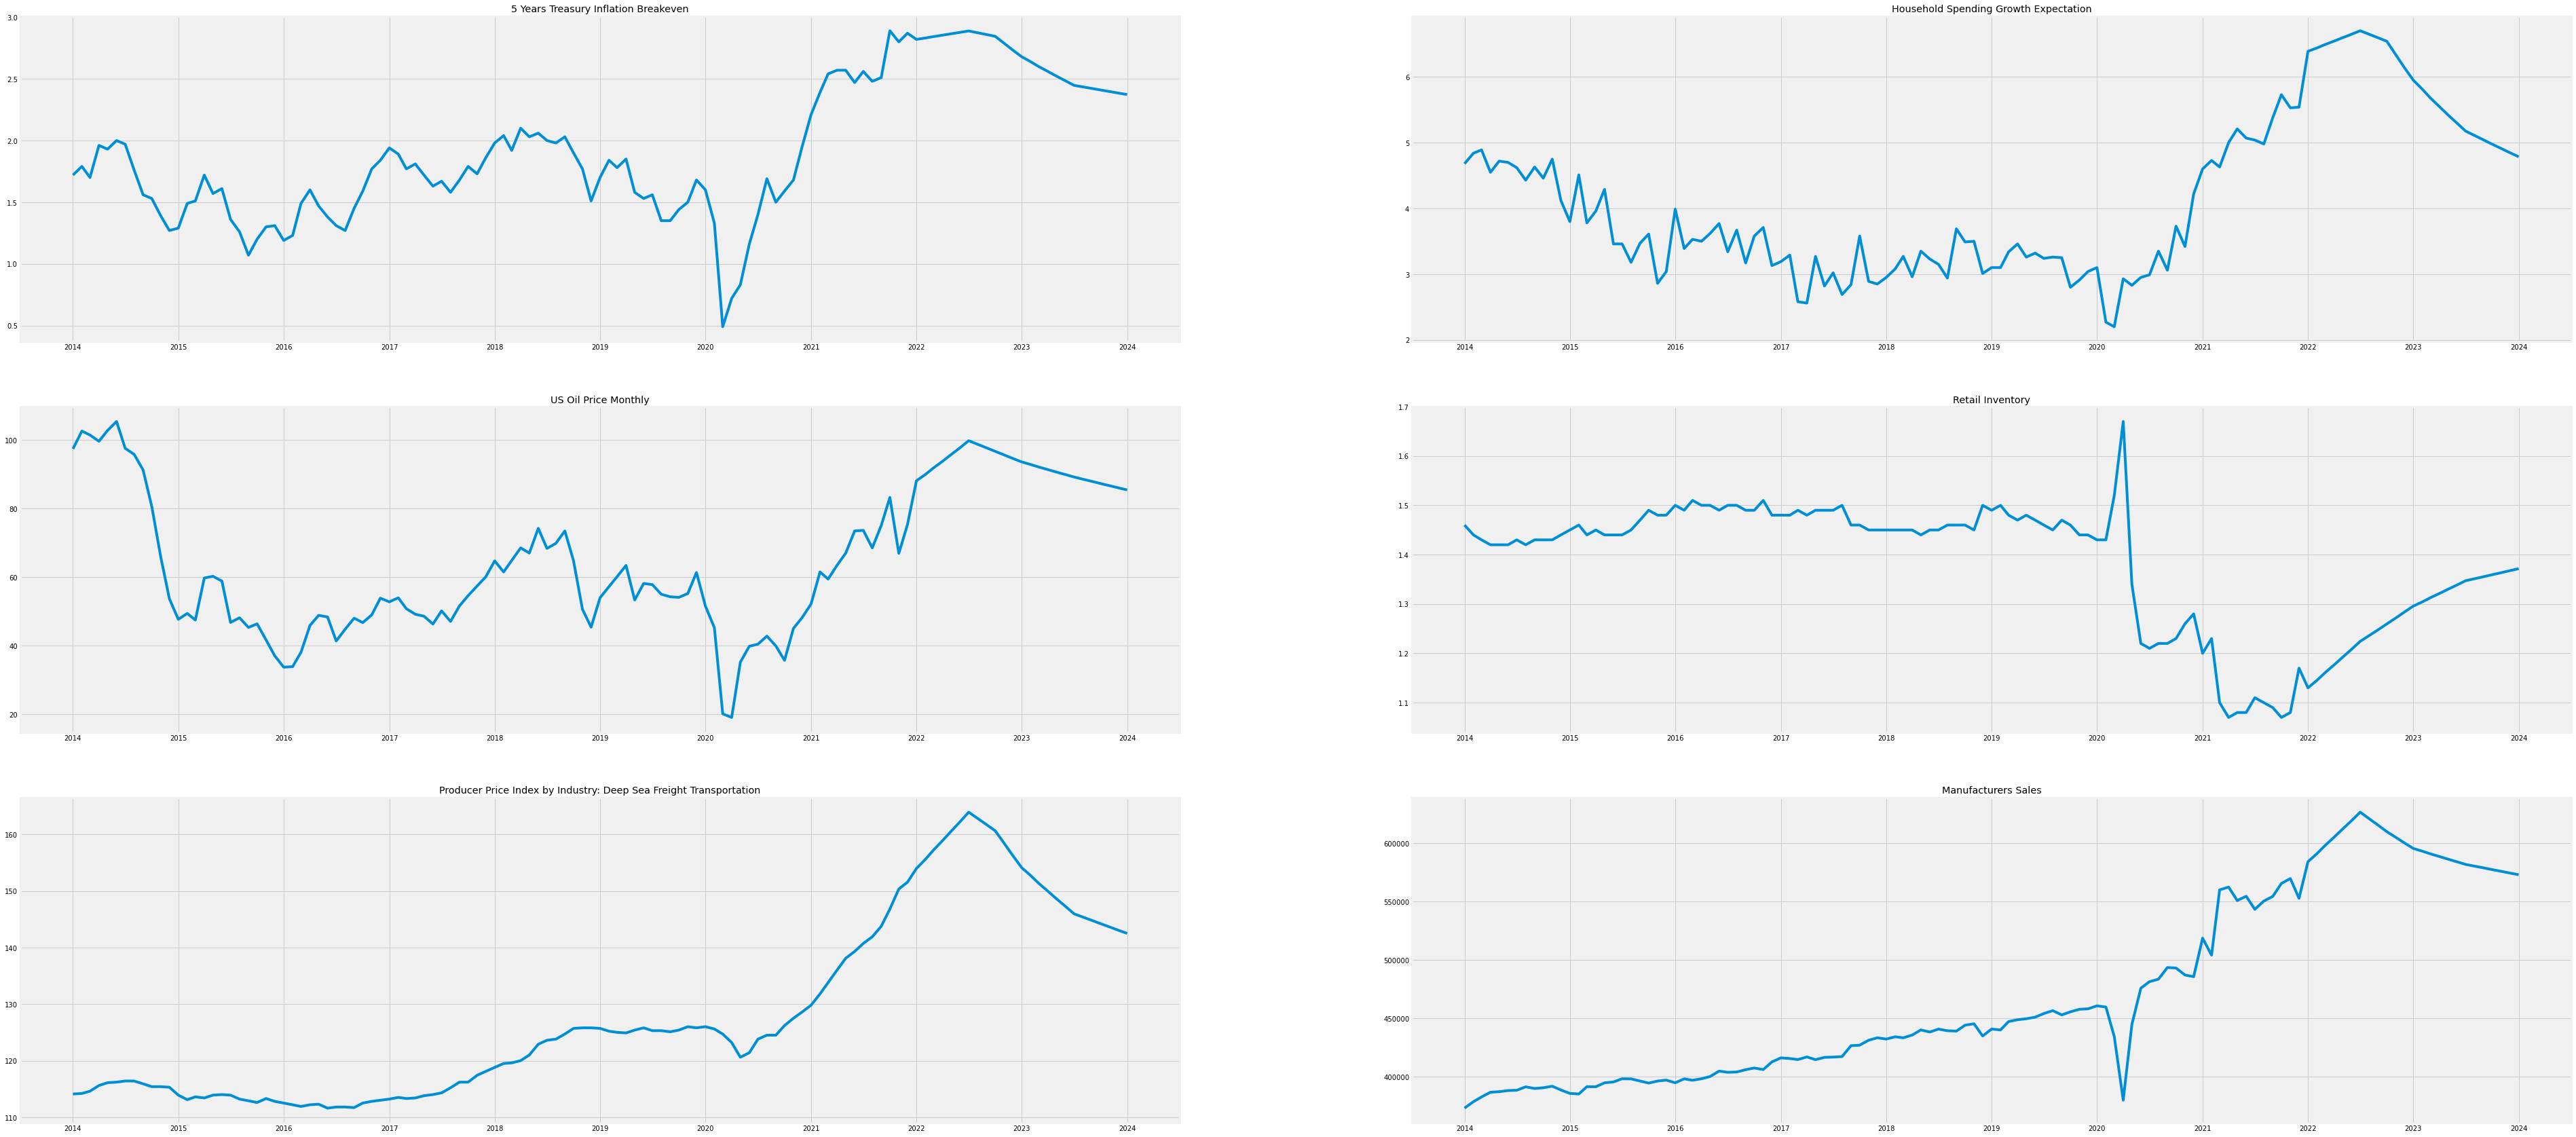

In [284]:
fig, axs =  plt.subplots(3, 2, figsize=(60,30))
axs[0,0].plot(PPID['DATE'],PPID.iloc[:,2])
axs[0,0].set_title('5 Years Treasury Inflation Breakeven')
axs[0,1].plot(PPID['DATE'],PPID.iloc[:,3])
axs[0,1].set_title('Household Spending Growth Expectation')
axs[1,0].plot(PPID['DATE'],PPID.iloc[:,4])
axs[1,0].set_title('US Oil Price Monthly')
axs[1,1].plot(PPID['DATE'],PPID.iloc[:,5])
axs[1,1].set_title('Retail Inventory')
axs[2,0].plot(PPID['DATE'],PPID.iloc[:,6])
axs[2,0].set_title('Producer Price Index by Industry: Deep Sea Freight Transportation')
axs[2,1].plot(PPID['DATE'],PPID.iloc[:,7])
axs[2,1].set_title('Manufacturers Sales')
plt.show()

## Regression Model
We get the value of the regression model here

In [285]:
X1 = CASS.iloc[:,2:8]
X2 = PPI.iloc[:,2:8]
y1 = CASS.iloc[:,1]
y2 = PPI.iloc[:,1]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.6, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.6, random_state=42)

reg1 = linear_model.LinearRegression()
reg2 = linear_model.LinearRegression()

reg1.fit(X1_train, y1_train)
reg2.fit(X2_train, y2_train)

print('Model 1: ', reg1.coef_,'Model 2: ', reg2.coef_)

Model 1:  [-1.01399031e-06 -3.79661684e-01  4.69699315e-02  7.13367011e-01
  4.45459489e-02  8.33274193e-05] Model 2:  [-8.91597280e+00 -1.09319005e+01  4.56730226e-01  1.77027411e+01
  4.24348101e+00 -9.74257892e-05]


In [286]:
print('Variance score model 1: {}'.format(reg1.score(X1_test, y1_test)),'Variance score model 2: {}'.format(reg2.score(X2_test, y2_test)))

Variance score model 1: 0.841497881653864 Variance score model 2: 0.9245594513607175


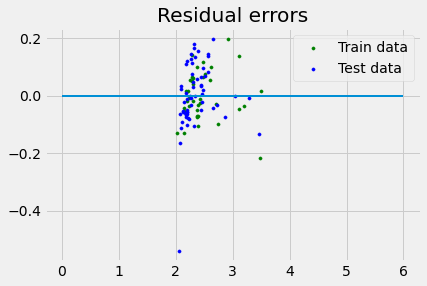

In [287]:
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg1.predict(X1_train), reg1.predict(X1_train) - y1_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg1.predict(X1_test), reg1.predict(X1_test) - y1_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 6, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

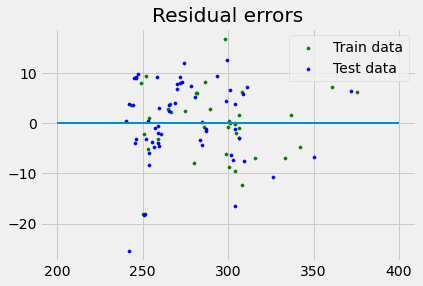

In [288]:
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg2.predict(X2_train), reg2.predict(X2_train) - y2_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg2.predict(X2_test), reg2.predict(X2_test) - y2_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 200, xmax = 400, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [289]:
y1_predict = reg1.predict(X1_test)
y2_predict = reg2.predict(X2_test)

score1 = r2_score(y1_test,y1_predict)
score2 = r2_score(y2_test,y2_predict)
print('R2 Score for model 1 is :',score1,'R2 Score for model 2 is :',score2)

R2 Score for model 1 is : 0.841497881653864 R2 Score for model 2 is : 0.9245594513607175


## Applying Regression to Target Y Variable
We apply the regression model to the target Y variable

In [290]:
def regr1(r,df):
    return reg1.predict([np.array(df.iloc[r,2:8], dtype=float)])

def regr2(r,df):
    return reg2.predict([np.array(df.iloc[r,2:8], dtype=float)])

In [291]:
for r in range(97,121):
    CASSA.iloc[r,1] = regr1(r=r,df=CASSA)
    CASSB.iloc[r,1] = regr1(r=r,df=CASSB)
    CASSC.iloc[r,1] = regr1(r=r,df=CASSC)
    CASSD.iloc[r,1] = regr1(r=r,df=CASSD)
    PPIA.iloc[r,1] = regr2(r=r,df=PPIA)
    PPIB.iloc[r,1] = regr2(r=r,df=PPIB)
    PPIC.iloc[r,1] = regr2(r=r,df=PPIC)
    PPID.iloc[r,1] = regr2(r=r,df=PPID)

In [292]:
df_merged = pd.concat((CASSA.iloc[:,0],CASSA.iloc[:,1], CASSB.iloc[:,1], CASSC.iloc[:,1], CASSD.iloc[:,1], PPIA.iloc[:,1], PPIB.iloc[:,1], PPIC.iloc[:,1], PPID.iloc[:,1]),axis=1)
df_merged.columns = ['Date','A','B','C','D','E','F','G','H']
df_merged

Date         A         B         C         D           E  \
0   2014-01-01  2.246000  2.246000  2.246000  2.246000  263.000000   
1   2014-02-01  2.237000  2.237000  2.237000  2.237000  262.200000   
2   2014-03-01  2.246000  2.246000  2.246000  2.246000  262.100000   
3   2014-04-01  2.268000  2.268000  2.268000  2.268000  263.300000   
4   2014-05-01  2.314000  2.314000  2.314000  2.314000  264.000000   
..         ...       ...       ...       ...       ...         ...   
116 2023-09-01  2.857795  3.078269  3.175082  3.251776  331.798652   
117 2023-10-01  2.822292  3.051796  3.152662  3.232444  328.895975   
118 2023-11-01  2.785811  3.024673  3.129745  3.212715  326.006355   
119 2023-12-01  2.748316  2.996879  3.106314  3.192580  323.129943   
120 2024-01-01  2.709768  2.968389  3.082353  3.172025  320.266886   

              F           G           H  
0    263.000000  263.000000  263.000000  
1    262.200000  262.200000  262.200000  
2    262.100000  262.100000  262.100000  
3    263.300000  263.300000  263.300000  
4    264.000000  264.000000  264.000000  
..          ...         ...         ...  
116  346.158657  352.044397  359.276864  
117  343.518500  349.890317  357.575592  
118  340.887181  347.740807  355.876165  
119  338.264790  345.595961  354.178653  
120  335.651417  343.455867  352.483127  

[121 rows x 9 columns]

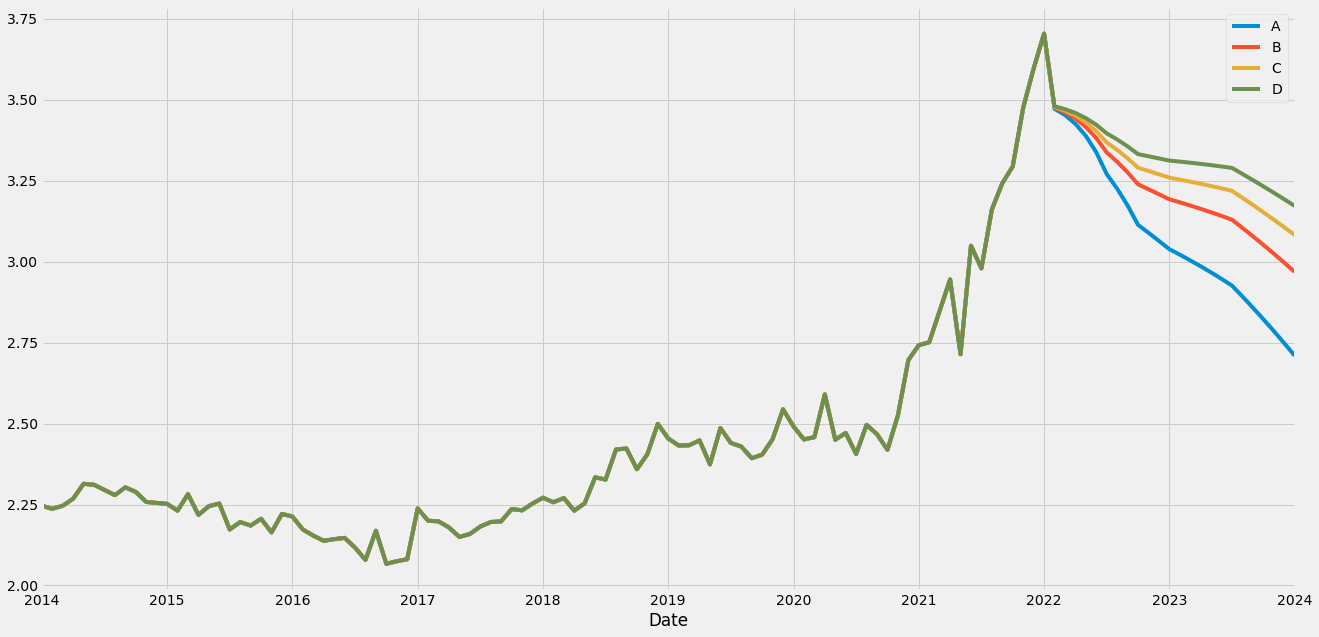

In [293]:
df_merged.plot(x="Date", y=['A','B','C','D'],
        kind="line", figsize=(20, 10))
plt.show()

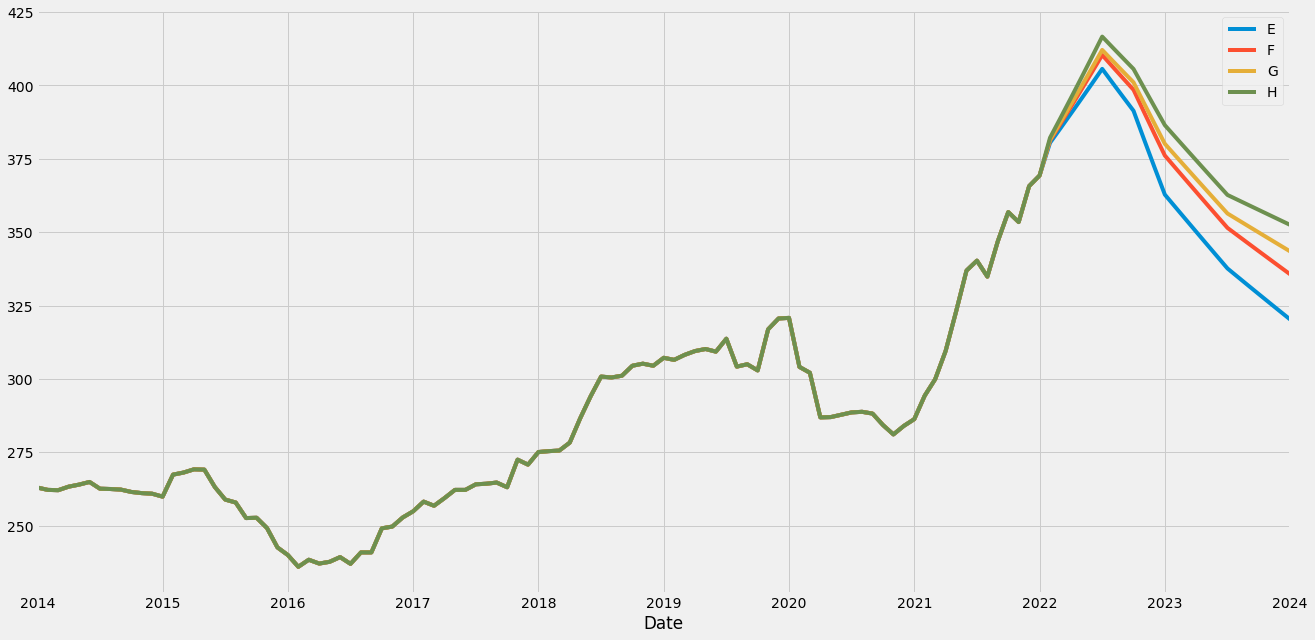

In [294]:
df_merged.plot(x="Date", y=['E','F','G','H'],
        kind="line", figsize=(20, 10))
plt.show()

## Save to CSV
Save the file as CSV

In [295]:
CASSA.to_csv('D:\Data\Project\Cargo Price Analysis\To Github\Projected Value\CASSA.csv')
CASSB.to_csv('D:\Data\Project\Cargo Price Analysis\To Github\Projected Value\CASSB.csv')
CASSC.to_csv('D:\Data\Project\Cargo Price Analysis\To Github\Projected Value\CASSC.csv')
CASSD.to_csv('D:\Data\Project\Cargo Price Analysis\To Github\Projected Value\CASSD.csv')
PPIA.to_csv('D:\Data\Project\Cargo Price Analysis\To Github\Projected Value\PPIA.csv')
PPIB.to_csv('D:\Data\Project\Cargo Price Analysis\To Github\Projected Value\PPIB.csv')
PPIC.to_csv('D:\Data\Project\Cargo Price Analysis\To Github\Projected Value\PPIC.csv')
PPID.to_csv('D:\Data\Project\Cargo Price Analysis\To Github\Projected Value\PPID.csv')